In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv('datasets/1/fraudTrain.csv')

In [4]:
df.shape

(1296675, 23)

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


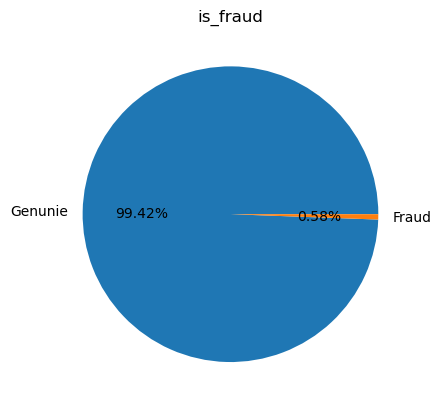

In [8]:
plt.pie(df['is_fraud'].value_counts(), autopct='%.2f%%', labels=['Genunie', 'Fraud'])
plt.title('is_fraud')
plt.show()

In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=['Unnamed: 0','first','last','street'], inplace=True)

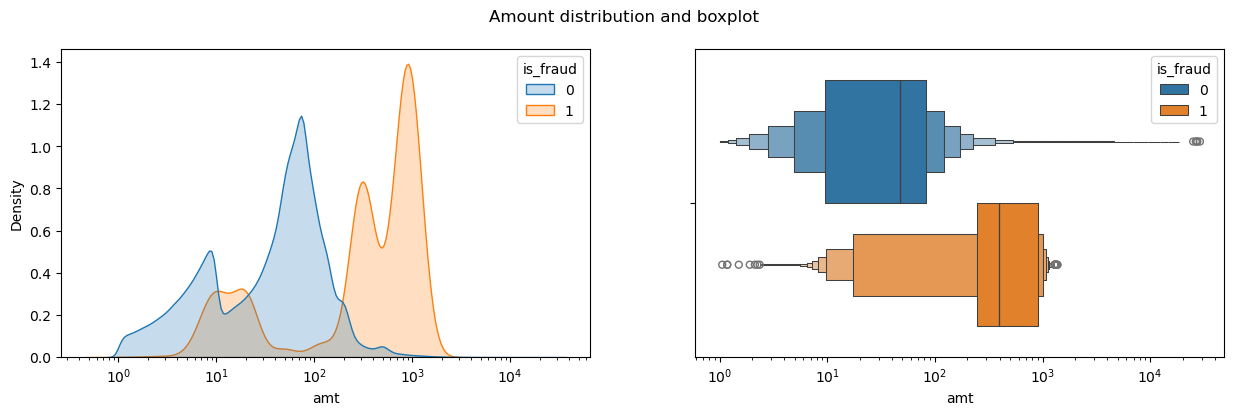

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

sns.kdeplot(data=df, x='amt', hue='is_fraud', fill=True, log_scale=True, common_norm=False, ax=ax[0])

sns.boxenplot(data=df, x='amt', hue='is_fraud', log_scale=True, ax=ax[1])

plt.suptitle('Amount distribution and boxplot')

plt.show()

amt can be divided into 3-4 bins (binning) cause few low amount and few high amount, others can medium OR 

Since the distribution is skewed and plotted on a log scale, applying a log transformation to “amt” can stabilize variance and improve model performance

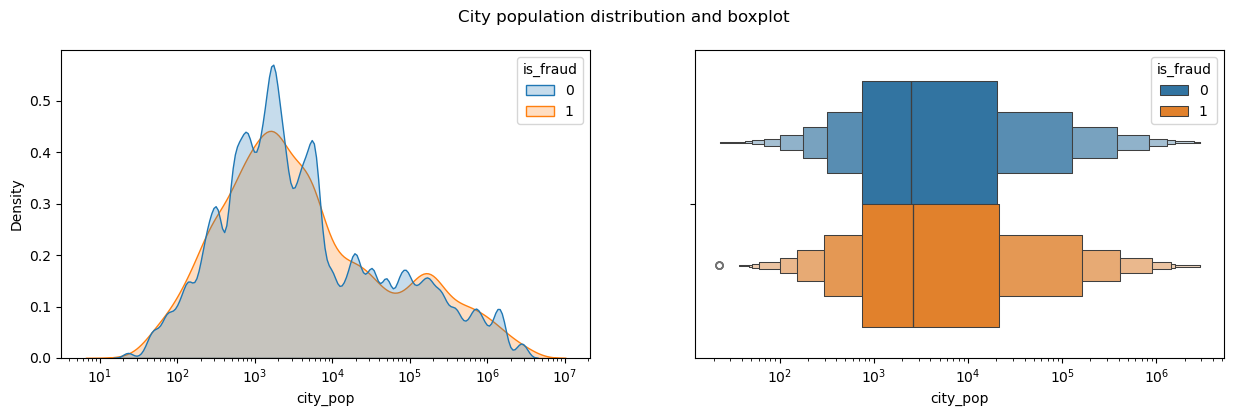

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

sns.kdeplot(data=df, x='city_pop', hue='is_fraud', fill=True, log_scale=True, common_norm=False, ax=ax[0])

sns.boxenplot(data=df, x='city_pop', hue='is_fraud', log_scale=True, ax=ax[1])

plt.suptitle('City population distribution and boxplot')

plt.show()

log transformation can be considered, but need to experimented

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  trans_num         

In [15]:
df[df['is_fraud']==1].groupby('category').max()['amt'].sort_values(ascending=False)

category
shopping_pos      1376.04
shopping_net      1312.98
misc_net          1112.91
misc_pos          1036.63
entertainment      695.53
home               443.25
grocery_pos        397.97
food_dining        149.42
personal_care       54.69
health_fitness      26.47
kids_pets           25.54
gas_transport       24.84
grocery_net         18.24
travel              13.11
Name: amt, dtype: float64

In [16]:
df[df['is_fraud']==1].groupby('category').count()['amt'].sort_values(ascending=False)

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: amt, dtype: int64

we can make a features as category risk encodeing ranging from 1 to 10 where 1 being the lowest and 10 being the highest 

In [17]:
df[df['is_fraud']==1].groupby('category')['amt'].mean().sort_values(ascending=False)

category
shopping_net      999.254939
shopping_pos      876.921815
misc_net          797.012852
entertainment     503.535579
grocery_pos       311.989616
home              257.432626
misc_pos          218.284080
food_dining       120.076954
personal_care      26.170545
health_fitness     20.248421
kids_pets          18.121674
gas_transport      12.288204
grocery_net        12.162836
travel              9.064569
Name: amt, dtype: float64

here a feature as if amount being more than or less then category avg

In [18]:
df[df['is_fraud']==1]['merchant'].value_counts().head(51)

merchant
fraud_Rau and Sons                        49
fraud_Cormier LLC                         48
fraud_Kozey-Boehm                         48
fraud_Doyle Ltd                           47
fraud_Vandervort-Funk                     47
fraud_Kilback LLC                         47
fraud_Padberg-Welch                       44
fraud_Kuhn LLC                            44
fraud_Terry-Huel                          43
fraud_Koepp-Witting                       42
fraud_Goyette Inc                         42
fraud_Jast Ltd                            42
fraud_Kiehn-Emmerich                      41
fraud_Kerluke-Abshire                     41
fraud_Schmeler, Bashirian and Price       41
fraud_McDermott-Weimann                   41
fraud_Hudson-Ratke                        40
fraud_Gleason-Macejkovic                  40
fraud_Moen, Reinger and Murphy            40
fraud_Boyer PLC                           40
fraud_Murray-Smitham                      40
fraud_Bailey-Morar                        39
f

we can decide a threshold value (i.e. >35) for fraud merchant above which it is flagged as 1 otherwise 

as per observation top 50 merchants which has been flagged as fraud has more than 35 fraud transaction

or can be binned as per risk i.e. high risk, mid risk and low

In [19]:
df[df['is_fraud']==1]['zip'].value_counts().head(10)

zip
15010    24
48088    23
16034    21
82514    21
68375    19
55606    19
95148    18
41812    18
34112    18
33760    16
Name: count, dtype: int64

similar thing can be done with zip codes, risk encoding OR binning

Age can be binned

In [20]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radius of Earth in km
    return km

In [21]:
df['distance'] = haversine_distance(
    df['merch_lat'],
    df['merch_long'],
    df['lat'],
    df['long']
)

In [23]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    
# Sort by 'cc_num' and 'trans_date_trans_time'
df = df.sort_values(['cc_num', 'trans_date_trans_time'])

# Set 'trans_date_trans_time' as index for time-based rolling
df = df.set_index('trans_date_trans_time')

# Rolling transaction count per card in last 24 hours
df['trans_count_24h'] = df.groupby('cc_num')['amt'].transform(
    lambda x: x.rolling('24h').count())

# Rolling average amount per card in last 24 hours
df['avg_amt_24h'] = df.groupby('cc_num')['amt'].transform(
    lambda x: x.rolling('24h').mean())

# Rolling sum of amounts per card in last 24 hours
df['sum_amt_24h'] = df.groupby('cc_num')['amt'].transform(
    lambda x: x.rolling('24h').sum())

# Rolling transaction count per card in last 7 days
df['trans_count_7d'] = df.groupby('cc_num')['amt'].transform(
    lambda x: x.rolling('7d').count())

# Reset index to make 'trans_date_trans_time' a column again
df = df.reset_index()

# Additional feature engineering
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
# Calculate deviation from mean amount per card
df['amt_deviation'] = df['amt'] - df.groupby('cc_num')['amt'].transform('mean')

# Bin amount
df['amt_bin'] = pd.qcut(df['amt'], q=4, labels=['low', 'medium', 'high', 'very_high'])

# Calculate risk scores
df['category_risk'] = df.groupby('category')['is_fraud'].transform('mean')
df['job_risk'] = df.groupby('job')['is_fraud'].transform('mean')

# Calculate age from dob
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Calculate unusual hour
customer_hour_mean = df.groupby('cc_num')['hour'].mean()
df['unusual_hour'] = df.apply(
    lambda x: 1 if abs(x['hour'] - customer_hour_mean.get(x['cc_num'], x['hour'])) > 6 else 0,
    axis=1
)

In [22]:
df['day_of_trans'] = pd.to_datetime(df['trans_date_trans_time']).dt.day

In [31]:
df['month_of_trans'] = pd.to_datetime(df['trans_date_trans_time']).dt.month

In [30]:
df['is_night'] = df['hour'].apply(lambda x : 1 if x >=22 and x<=5 else 0)

In [32]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'distance', 'day_of_trans', 'trans_count_24h', 'avg_amt_24h',
       'sum_amt_24h', 'trans_count_7d', 'hour', 'day_of_week', 'is_weekend',
       'amt_deviation', 'amt_bin', 'category_risk', 'job_risk', 'age',
       'unusual_hour', 'is_night', 'month_of_trans'],
      dtype='object')

<Axes: xlabel='age', ylabel='Density'>

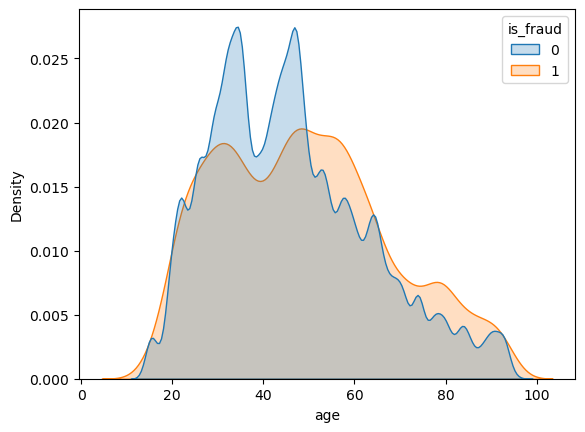

In [33]:
sns.kdeplot(data=df, x='age', fill=True, hue='is_fraud', common_norm=False)

In [34]:
df['age_bin'] = pd.qcut(df['age'], 4, labels=['young','young_adult','adult','old'])

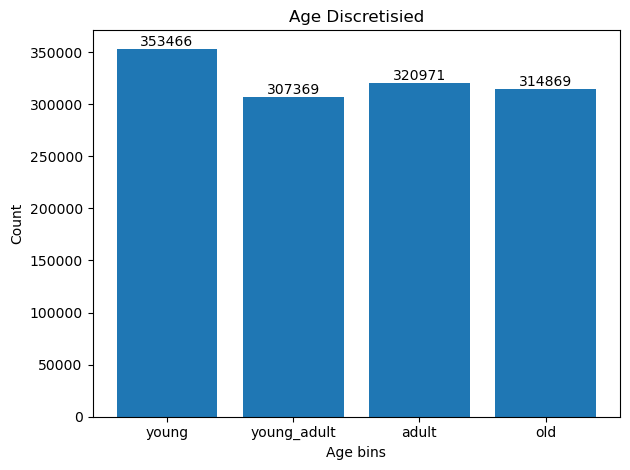

In [35]:
age_counts = df['age_bin'].value_counts().sort_index()

bars = plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age bins')
plt.ylabel('Count')
plt.title('Age Discretisied')

plt.bar_label(bars)

plt.tight_layout()
plt.show()

In [36]:
df['city_pop_log'] = df['city_pop'].transform(np.log)

In [ ]:
# category_risk_encoding = (df[df['is_fraud'] == 1].groupby('category')['is_fraud'].count().rank() - 4).apply(lambda x : 1 if x <= 0 else x)

In [ ]:
# df['category_risk_encoded'] = df['category'].map(category_risk_encoding)

In [ ]:
# mean_fraud_amt = df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending=False)

In [ ]:
# def mean_fraud_transform(row : pd.DataFrame):
#     if mean_fraud_amt[row['category']] > row['amt']:
#         return 1
#     else : return 0

In [ ]:
# df['mean_fraud_transform'] = df.apply(lambda row : mean_fraud_transform(row), axis=1)

In [37]:
merchant_risk_map = pd.cut(df[df['is_fraud']==1]['merchant'].value_counts(), 3, labels=['low','medium','high'])

In [38]:
df['merchant_risk'] = df['merchant'].map(merchant_risk_map).fillna('low')

In [39]:
zip_risk_map = pd.cut(df[df['is_fraud']==1]['zip'].value_counts(), 3, labels=['low','medium','high'])

In [40]:
df['zip_risk'] = df['zip'].map(zip_risk_map).fillna('low')

In [41]:
city_risk_map = pd.cut(df[df['is_fraud']==1]['city'].value_counts(), 3, labels=['low','medium','high'])

In [42]:
df['city_risk_encoded'] = df['city'].map(city_risk_map).fillna('low')

In [43]:
fraud_rate_per_state = (df[df['is_fraud']==1]['state'].value_counts())/df['state'].value_counts().sort_values(ascending=False)

In [44]:
df['fraud_rate_per_state'] = df['state'].map(fraud_rate_per_state)

In [45]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'distance', 'day_of_trans', 'trans_count_24h', 'avg_amt_24h',
       'sum_amt_24h', 'trans_count_7d', 'hour', 'day_of_week', 'is_weekend',
       'amt_deviation', 'amt_bin', 'category_risk', 'job_risk', 'age',
       'unusual_hour', 'is_night', 'month_of_trans', 'age_bin', 'city_pop_log',
       'merchant_risk', 'zip_risk', 'city_risk_encoded',
       'fraud_rate_per_state'],
      dtype='object')

Cyclic encoding

In [ ]:
df['month_sin'] = np.sin(2 * np.pi * df['month_of_trans'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_of_trans'] / 12)

In [48]:
df['day_sin'] = np.sin(2 * np.pi * df['day_of_trans'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_trans'] / 31)

In [66]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

In [ ]:

# df['min_sin'] = np.sin(2 * np.pi * df['minute_of_trans'] / 60)
# df['min_cos'] = np.cos(2 * np.pi * df['minute_of_trans'] / 60)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 44 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   city                   1296675 non-null  object        
 7   state                  1296675 non-null  object        
 8   zip                    1296675 non-null  int64         
 9   lat                    1296675 non-null  float64       
 10  long                   1296675 non-null  float64       
 11  city_pop               1296675 non-null  int64         
 12  job                    12966

In [ ]:
drop_columns = ['lat','long','dob','trans_num','unix_time','merch_lat','merch_long','trans_date_trans_time','cc_num','merchant','category','city','state','zip','city_pop',
                'day_of_trans','month_of_trans','age','amt','job']

In [50]:
df.drop(columns=drop_columns,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   gender                1296675 non-null  object  
 1   job                   1296675 non-null  object  
 2   distance              1296675 non-null  float64 
 3   trans_count_24h       1296675 non-null  float64 
 4   avg_amt_24h           1296675 non-null  float64 
 5   sum_amt_24h           1296675 non-null  float64 
 6   trans_count_7d        1296675 non-null  float64 
 7   hour                  1296675 non-null  int32   
 8   day_of_week           1296675 non-null  int32   
 9   is_weekend            1296675 non-null  int64   
 10  amt_deviation         1296675 non-null  float64 
 11  amt_bin               1296675 non-null  category
 12  category_risk         1296675 non-null  float64 
 13  job_risk              1296675 non-null  float64 
 14  unusual_hour      

In [52]:
y = df['is_fraud']
X = df.drop(columns=['is_fraud'],inplace=True)

In [53]:
X = df.copy()

In [58]:
X.drop(columns=['amt'],inplace=True)

In [61]:
X.drop(columns=['job'],inplace=True)

In [56]:
df.drop(columns=['amt'],inplace=True)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_maps = {}

    def fit(self, X, y=None):
        for col in X.columns:
            self.freq_maps[col] = X[col].value_counts()
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col in X.columns:
            X_encoded[col] = X[col].map(self.freq_maps[col]).fillna(0)
        return X_encoded

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   gender                1296675 non-null  object  
 1   distance              1296675 non-null  float64 
 2   trans_count_24h       1296675 non-null  float64 
 3   avg_amt_24h           1296675 non-null  float64 
 4   sum_amt_24h           1296675 non-null  float64 
 5   trans_count_7d        1296675 non-null  float64 
 6   hour                  1296675 non-null  int32   
 7   day_of_week           1296675 non-null  int32   
 8   is_weekend            1296675 non-null  int64   
 9   amt_deviation         1296675 non-null  float64 
 10  amt_bin               1296675 non-null  category
 11  category_risk         1296675 non-null  float64 
 12  job_risk              1296675 non-null  float64 
 13  unusual_hour          1296675 non-null  int64   
 14  is_night          

In [69]:
scaling_col = ['distance','trans_count_24h','avg_amt_24h','sum_amt_24h','trans_count_7d','amt_deviation','is_weekend','is_night','job_risk'
               'city_pop_log','category_risk','fraud_rate_per_state','day_sin','day_cos','unusual_hour'
               'month_sin','month_cos','day_sin','day_cos','hour']
OHE_col = ['gender','day_name_of_trans','age_bin','merchant_risk','zip_risk','city_risk_encoded','amt_bin']

In [252]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preproceser = ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),scaling_col),
    ('freq_encoding',FrequencyEncoder(),freq_col),
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),OHE_col)
],force_int_remainder_cols=False)

pipeline = Pipeline(steps=[
    ('preproceser',preproceser),
    ('SMOTE',SMOTE()),
    ('clf',RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [253]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preproceser',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('scaling', StandardScaler(),
                                                  ['amt', 'distance',
                                                   'is_weekend', 'is_night',
                                                   'city_pop_log',
                                                   'category_risk_encoded',
                                                   'fraud_rate_per_state',
                                                   'day_sin', 'day_cos',
                                                   'month_sin', 'month_cos',
                                                   'hour_sin', 'hour_cos',
                                                   'min_sin', 'min_cos']),
                                                 ('freq_encoding',
                                                  FrequencyEncoder(), ['job']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'day_name_of_trans',
                                                   'age_bin', 'merchant_risk',
                                                   'zip_risk',
                                                   'city_risk_encoded'])])),
                ('SMOTE', SMOTE()),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [255]:
def get_feature_names_from_columntransformer(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        # For transformers that support get_feature_names_out (like OHE)
        if hasattr(transformer, 'get_feature_names_out'):
            # columns must be passed for OHE; not needed for StandardScaler
            if isinstance(columns, (list, tuple)):
                names = transformer.get_feature_names_out(columns)
            else:
                names = transformer.get_feature_names_out()
            feature_names.extend(names)
        else:
            # For FrequencyEncoder or analogues
            if isinstance(columns, (list, tuple)):
                feature_names.extend(columns)
            else:
                feature_names.append(columns)
    return feature_names

# After fitting your preprocessor:
feature_names = get_feature_names_from_columntransformer(preproceser)


Length of feature_names: 32
Length of feature_importances: 32
Final lengths - feature_names: 32, importances: 32


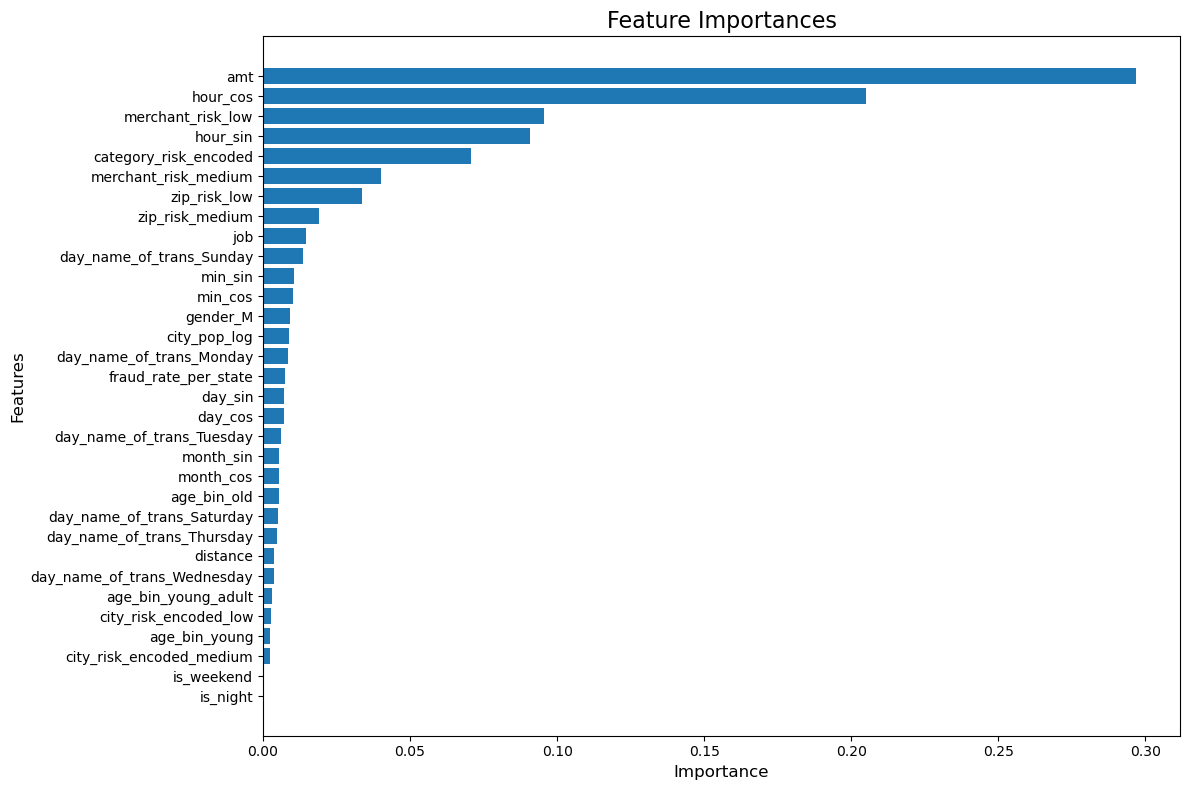

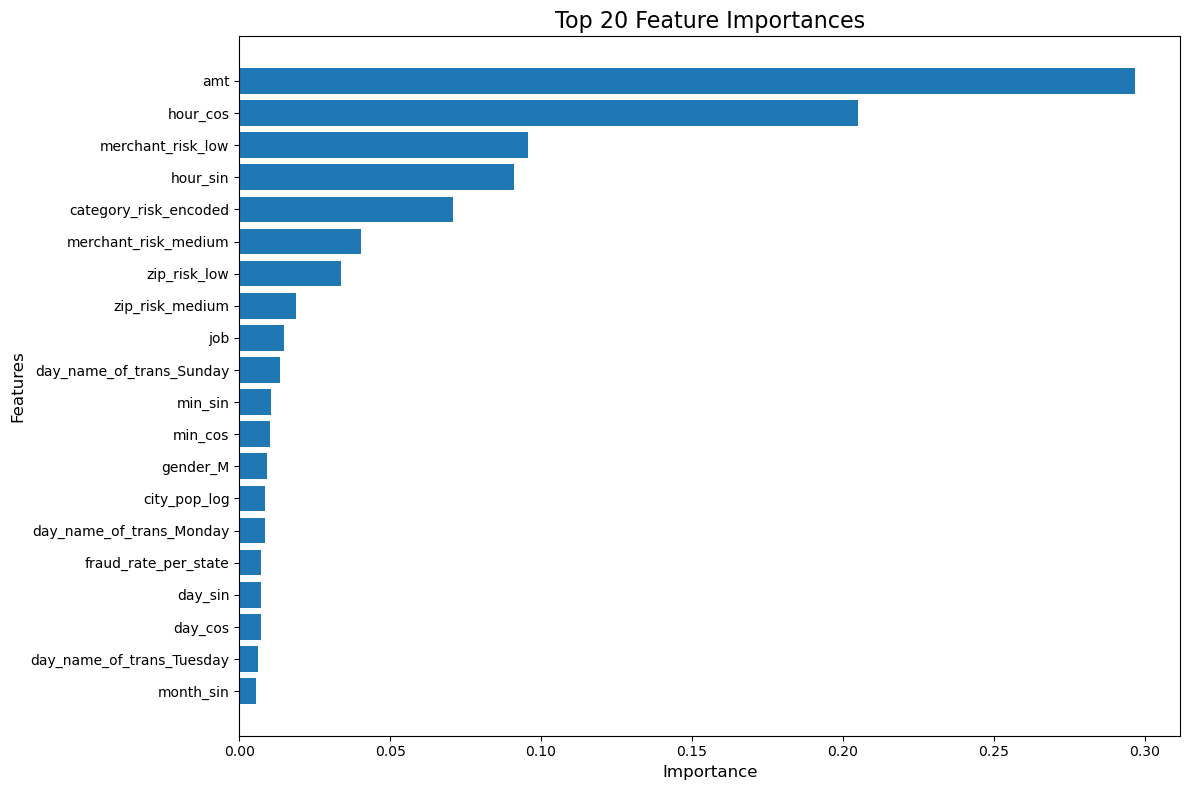

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names and importances
feature_names = get_feature_names_from_columntransformer(preproceser)  # Note: fix typo if needed
feature_importances = pipeline.named_steps['clf'].feature_importances_

# Debug lengths
print(f'Length of feature_names: {len(feature_names)}')
print(f'Length of feature_importances: {len(feature_importances)}')

# Ensure both are proper format
if not isinstance(feature_importances, np.ndarray):
    feature_importances = np.array(feature_importances)

# Ensure feature_names is a flat list
if isinstance(feature_names, (list, tuple)) and len(feature_names) > 0:
    if isinstance(feature_names[0], (list, tuple, np.ndarray)):
        feature_names = [item for sublist in feature_names for item in sublist]

# If lengths don't match, truncate to minimum length
min_length = min(len(feature_names), len(feature_importances))
feature_names = feature_names[:min_length]
feature_importances = feature_importances[:min_length]

print(f'Final lengths - feature_names: {len(feature_names)}, importances: {len(feature_importances)}')

# Create DataFrame and plot
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=True)

# Create the horizontal bar plot (like your screenshot)
plt.figure(figsize=(12, 8))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# Optional: Show only top N features
top_n = 20
top_features = importances_df.tail(top_n)

plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'])
plt.title(f'Top {top_n} Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [257]:
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# y_true = true labels
# y_pred = predicted labels (0/1)
# y_scores = predicted probabilities for the positive class
y_pred = pipeline.predict(X_test)              # Predicted class labels (0 or 1)
y_scores = pipeline.predict_proba(X_test)[:,1] # Probability for the positive class (fraud)

roc_auc = roc_auc_score(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred, digits=4))


ROC AUC: 0.9845
PR AUC: 0.8206
Recall: 0.6264
Precision: 0.9324
F1 Score: 0.7494
Confusion Matrix:
[[257793     67]
 [   551    924]]
              precision    recall  f1-score   support

           0     0.9979    0.9997    0.9988    257860
           1     0.9324    0.6264    0.7494      1475

    accuracy                         0.9976    259335
   macro avg     0.9651    0.8131    0.8741    259335
weighted avg     0.9975    0.9976    0.9974    259335



In [258]:
top_n = 20
top_features = importances_df.tail(top_n)['feature'].tolist()

In [259]:
# Example column lists from your initial pipeline
scaling_col_top = [col for col in scaling_col if col in top_features]
freq_col_top = [col for col in freq_col if col in top_features]

# For OHE features, match prefix
OHE_col_top = []
for base_col in OHE_col:
    for feat in top_features:
        if feat.startswith(base_col):
            if base_col not in OHE_col_top:
                OHE_col_top.append(base_col)


In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Build preprocessor for top features
preprocessor_top = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), scaling_col_top),
    ('freq_encoding', FrequencyEncoder(), freq_col_top),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), OHE_col_top)
], force_int_remainder_cols=False)

pipeline_top = Pipeline([
    ('preprocessor', preprocessor_top),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fit on X_train, y_train
pipeline_top.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('scaling', StandardScaler(),
                                                  ['amt', 'city_pop_log',
                                                   'category_risk_encoded',
                                                   'fraud_rate_per_state',
                                                   'day_sin', 'day_cos',
                                                   'month_sin', 'hour_sin',
                                                   'hour_cos', 'min_sin',
                                                   'min_cos']),
                                                 ('freq_encoding',
                                                  FrequencyEncoder(), ['job']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'day_name_of_trans',
                                                   'merchant_risk',
                                                   'zip_risk'])])),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [261]:
y_pred_top = pipeline_top.predict(X_test)
y_proba_top = pipeline_top.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, average_precision_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

roc_auc = roc_auc_score(y_test, y_proba_top)
pr_auc = average_precision_score(y_test, y_proba_top)
recall = recall_score(y_test, y_pred_top)
precision = precision_score(y_test, y_pred_top)
f1 = f1_score(y_test, y_pred_top)
cm = confusion_matrix(y_test, y_pred_top)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred_top, digits=4))


ROC AUC: 0.9837
PR AUC: 0.8599
Recall: 0.6414
Precision: 0.9404
F1 Score: 0.7626
Confusion Matrix:
[[257800     60]
 [   529    946]]
              precision    recall  f1-score   support

           0     0.9980    0.9998    0.9989    257860
           1     0.9404    0.6414    0.7626      1475

    accuracy                         0.9977    259335
   macro avg     0.9692    0.8206    0.8807    259335
weighted avg     0.9976    0.9977    0.9975    259335



In [263]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   amt                    1296675 non-null  float64 
 1   gender                 1296675 non-null  object  
 2   job                    1296675 non-null  object  
 3   distance               1296675 non-null  float64 
 4   day_name_of_trans      1296675 non-null  object  
 5   is_weekend             1296675 non-null  int64   
 6   is_night               1296675 non-null  int64   
 7   age_bin                1296675 non-null  category
 8   city_pop_log           1296675 non-null  float64 
 9   category_risk_encoded  1296675 non-null  float64 
 10  mean_fraud_transform   1296675 non-null  int64   
 11  merchant_risk          1296675 non-null  category
 12  zip_risk               1296675 non-null  category
 13  city_risk_encoded      1296675 non-null  category
 14  fr

In [ ]:
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[
    ('preproceser',preprocessor_top),
    ('SMOTE',SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=3)),
])

X_train_resampled, y_train_resampled = final_pipeline.fit_resample(X, y)

In [265]:
print("Shape after preprocessing & SMOTE:", X_train_resampled.shape)

Shape after preprocessing & SMOTE: (2578338, 23)


<Axes: ylabel='count'>

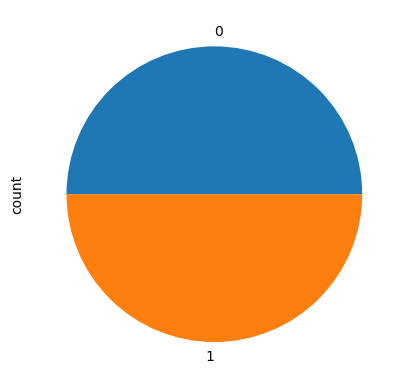

In [266]:
y_train_resampled.value_counts().plot(kind='pie')

In [267]:
from sklearn.model_selection import train_test_split

X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(
    X_train_resampled, y_train_resampled,
    test_size=0.2, random_state=42,
    stratify=y_train_resampled
)


In [307]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1296675
    Positive: 7506 (0.58% of total)



In [308]:
initial_bias = np.log([pos/neg])
initial_bias

array([-5.1460504])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model = keras.Sequential([
    layers.Input(shape=(23,)),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.002)),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.002)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

def focal_loss(alpha=0.75, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
        ce = -y_true*K.log(y_pred) - (1-y_true)*K.log(1-y_pred)
        p_t = y_true*y_pred + (1-y_true)*(1-y_pred)
        alpha_t = y_true*alpha + (1-y_true)*(1-alpha)
        return K.mean(alpha_t * K.pow(1-p_t, gamma) * ce)
    return loss

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss=focal_loss(0.75,2),
              metrics=['AUC','Precision','Recall'])




# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor = 'val_AUC',
#     patience = 5,
#     mode = "max",
#     restore_best_weights = True
# )

early_stop = keras.callbacks.EarlyStopping(
        monitor='val_prc', mode='max',
        patience=5, restore_best_weights=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_AUC',
    patience = 2,
    factor = 0.5,
    verbose=1,
    mode = 'max'
)

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      'AUC'
]

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=METRICS
# )

history = model.fit(X_train_resampled,y_train_resampled,
                    validation_data=(X_val,y_val),
                    epochs=20,
                    batch_size=32,
                    callbacks = [early_stop, reduce_lr])



Epoch 1/20
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step - AUC: 0.8661 - Brier score: 0.1473 - accuracy: 0.7863 - auc: 0.8661 - cross entropy: 0.4739 - fn: 120457.8281 - fp: 73786.9062 - loss: 0.4739 - prc: 0.8798 - precision: 0.8202 - recall: 0.7270 - tn: 441935.0000 - tp: 395196.2812 - val_AUC: 0.9494 - val_Brier score: 0.0898 - val_accuracy: 0.8723 - val_auc: 0.9494 - val_cross entropy: 0.2947 - val_fn: 38012.0000 - val_fp: 27830.0000 - val_loss: 0.2947 - val_prc: 0.9530 - val_precision: 0.8876 - val_recall: 0.8526 - val_tn: 230004.0000 - val_tp: 219822.0000 - learning_rate: 0.0010
Epoch 2/20
64459/64459 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - AUC: 0.9297 - Brier score: 0.1045 - accuracy: 0.8488 - auc: 0.9297 - cross entropy: 0.3356 - fn: 91591.4922 - fp: 63657.5156 - loss: 0.3356 - prc: 0.9335 - precision: 0.8685 - recall: 0.8220 - tn: 451988.3438 - tp: 424138.6562 - val_AUC: 0.9490 - val_Brier score: 0.0959 - val_accuracy: 0.8485 - val_auc: 0.9490 - val_cross entropy: 0.3115 - val_fn:

In [365]:
history.history.keys()

dict_keys(['AUC', 'Brier score', 'accuracy', 'auc', 'cross entropy', 'fn', 'fp', 'loss', 'prc', 'precision', 'recall', 'tn', 'tp', 'val_AUC', 'val_Brier score', 'val_accuracy', 'val_auc', 'val_cross entropy', 'val_fn', 'val_fp', 'val_loss', 'val_prc', 'val_precision', 'val_recall', 'val_tn', 'val_tp', 'learning_rate'])

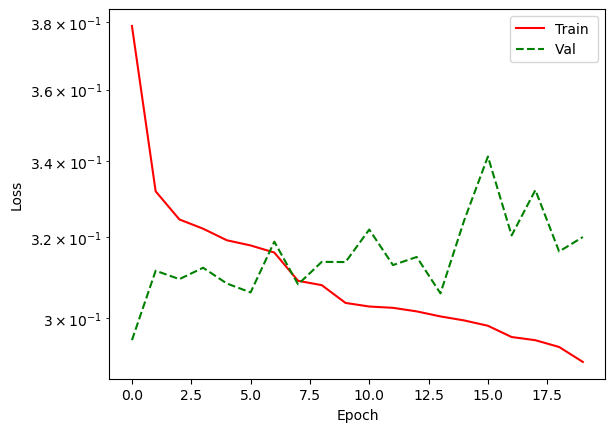

In [352]:
plt.semilogy(history.epoch, history.history['loss'],
               color='red', label='Train ')
plt.semilogy(history.epoch, history.history['val_loss'],
        color='green', label='Val ',
        linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

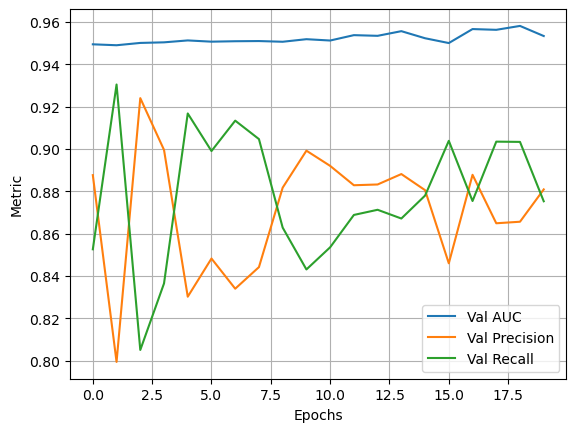

In [353]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_AUC'], label='Val AUC')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.legend()
plt.grid(True)
plt.show()


In [347]:
import shap
import numpy as np

# Wrap your Keras model for SHAP
explainer = shap.Explainer(model, X_train_resampled[:100], algorithm='auto')  # uses a subset as background
shap_values = explainer(X_val[:10])  # explain first 10 validation samples


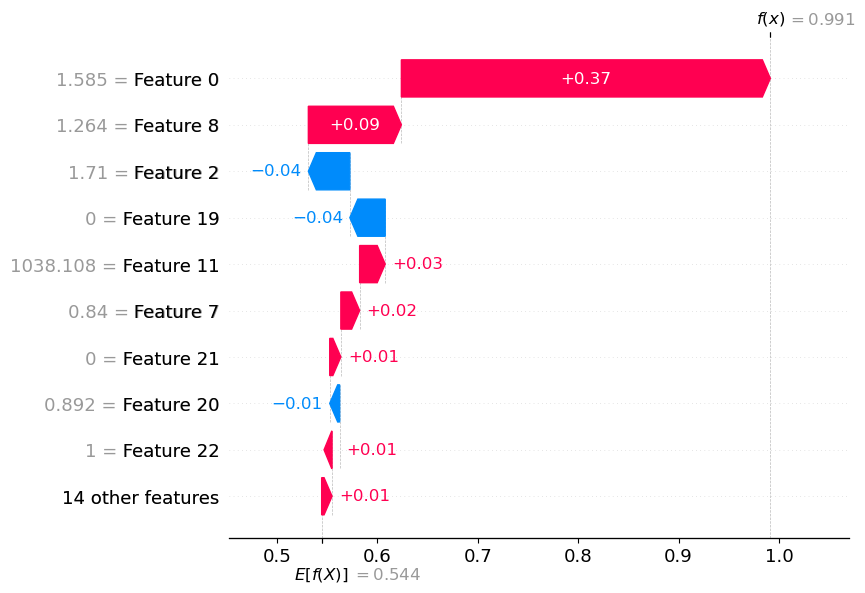

In [348]:
shap.plots.waterfall(shap_values[0])  # for a single sample

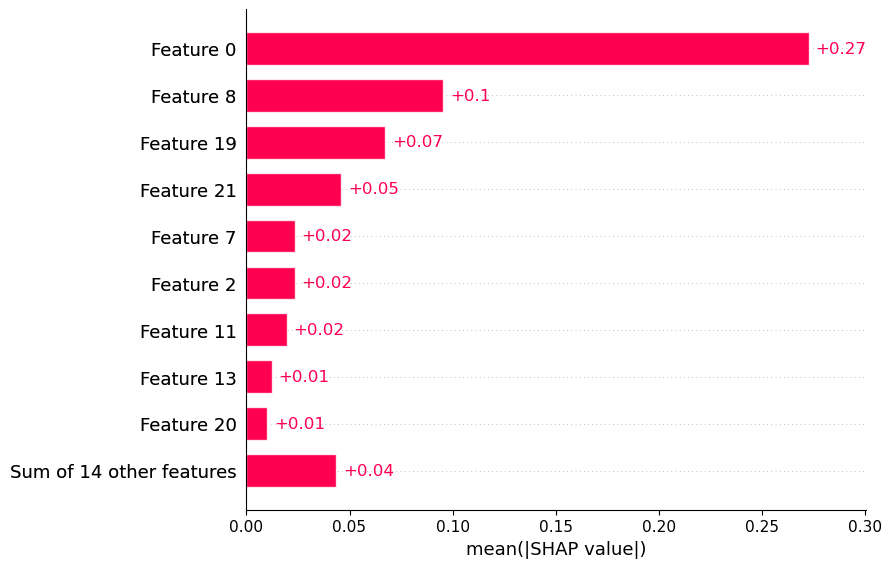

In [272]:
shap.plots.bar(shap_values)

In [273]:
def get_feature_names_from_column_transformer(ct):
    output_features = []

    for name, transformer, columns in ct.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            # For sklearn transformers like OneHotEncoder
            feature_names = transformer.get_feature_names_out(columns)
        else:
            # For custom transformers or passthrough
            feature_names = columns
        output_features.extend(feature_names)
    
    return output_features


In [274]:
feature_names = get_feature_names_from_column_transformer(preprocessor_top)

In [275]:
for i in range(len(feature_names)):
    print(f"Feature {i} = {feature_names[i]}")


Feature 0 = amt
Feature 1 = city_pop_log
Feature 2 = category_risk_encoded
Feature 3 = fraud_rate_per_state
Feature 4 = day_sin
Feature 5 = day_cos
Feature 6 = month_sin
Feature 7 = hour_sin
Feature 8 = hour_cos
Feature 9 = min_sin
Feature 10 = min_cos
Feature 11 = job
Feature 12 = gender_M
Feature 13 = day_name_of_trans_Monday
Feature 14 = day_name_of_trans_Saturday
Feature 15 = day_name_of_trans_Sunday
Feature 16 = day_name_of_trans_Thursday
Feature 17 = day_name_of_trans_Tuesday
Feature 18 = day_name_of_trans_Wednesday
Feature 19 = merchant_risk_low
Feature 20 = merchant_risk_medium
Feature 21 = zip_risk_low
Feature 22 = zip_risk_medium


## TESTING DATA

In [ ]:
#merchant, city, zip -> binning
#city_pop -> log
#category_risk_encoding
#category-amt -> mean_fraud_transformation
#fstate -> raud_rate_per_state
#day_of_trans(31), month_of_trans(12), hour_of_trans(24), minute_of_trans(60)

In [106]:
def cyclic_encoding(data, feature, new_feature_name, divisor):
    data[new_feature_name+'_sin'] = np.sin(2 * np.pi * data[feature] / divisor)
    data[new_feature_name+'_cos'] = np.cos(2 * np.pi * data[feature] / divisor)

def date_time_transformation(data, feature):
    data['day_of_trans'] = pd.to_datetime(data[feature]).dt.day
    data['month_of_trans'] = pd.to_datetime(data[feature]).dt.month
    data['year_of_trans'] = pd.to_datetime(data[feature]).dt.year
    data['day_name_of_trans'] = pd.to_datetime(data[feature]).dt.day_name()
    data['hour_of_trans'] = pd.to_datetime(data[feature]).dt.hour
    data['minute_of_trans'] = pd.to_datetime(data[feature]).dt.minute
    data['age'] = data['year_of_trans'] - pd.to_datetime(data['dob']).dt.year
    data['is_weekend'] = data['day_of_trans'].apply(lambda x : 1 if x in ['Sunday', 'Saturday'] else 0)
    data['is_night'] = data['hour_of_trans'].apply(lambda x : 1 if x >=22 and x<=5 else 0)
    
def risk_encoding(data, feature, bins, labels, en):
    feature_risk_map = pd.cut(data[data['is_fraud']==1][feature].value_counts(), bins, labels=labels)
    if en == True:
        data[feature+'_risk_encoded'] = data['merchant'].map(feature_risk_map).fillna('low')
    else:
        data[feature+'_risk'] = data['merchant'].map(feature_risk_map).fillna('low')



In [221]:
test_df = pd.read_csv('datasets/1/fraudTest.csv')

In [222]:
test_df.shape

(555719, 23)

In [223]:
test_df['distance'] = haversine_distance(
    test_df['merch_lat'],
    test_df['merch_long'],
    test_df['lat'],
    test_df['long']
)

date_time_transformation(test_df, 'trans_date_trans_time')

test_df['age_bin'] = pd.qcut(test_df['age'], 4, labels=['young','young_adult','adult','old'])

risk_encoding(test_df, 'merchant', 3, labels=['low','medium','high'], en = False)

risk_encoding(test_df, 'city', 3, labels=['low','medium','high'], en = True)

risk_encoding(test_df, 'zip', 3, labels=['low','medium','high'], en = False)

test_df['city_pop_log'] = test_df['city_pop'].transform(np.log)

category_risk_encoding = (test_df[test_df['is_fraud'] == 1].groupby('category')['is_fraud'].count().rank() - 4).apply(lambda x : 1 if x <= 0 else x)
test_df['category_risk_encoded'] = test_df['category'].map(category_risk_encoding)

mean_fraud_amt = test_df[test_df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending=False)
test_df['mean_fraud_transform'] = test_df.apply(lambda row : mean_fraud_transform(row), axis=1)

fraud_rate_per_state = ((test_df[test_df['is_fraud']==1]['state'].value_counts())/(test_df['state'].value_counts()))
test_df['fraud_rate_per_state'] = test_df['state'].map(fraud_rate_per_state).fillna(0)


cyclic_encoding(test_df,'day_of_trans','day',31)

cyclic_encoding(test_df,'month_of_trans','month',12)

cyclic_encoding(test_df,'hour_of_trans','hour',24)

cyclic_encoding(test_df,'minute_of_trans','min',60)

In [231]:
test_df.drop(columns=['Unnamed: 0','first','last','street'], inplace=True)

In [236]:
drop_columns = ['lat','long','dob','trans_num','unix_time','merch_lat','merch_long','trans_date_trans_time','cc_num','merchant','category','city','state','zip','city_pop',
                'day_of_trans','month_of_trans','year_of_trans','hour_of_trans','minute_of_trans','age']

In [237]:
test_df.drop(columns=drop_columns,inplace=True)

In [243]:
y_test_df = test_df['is_fraud']
test_df.drop(columns=['is_fraud'],inplace=True)
X_test_df = test_df.copy()

In [277]:
# Example column lists from your initial pipeline
scaling_col_top = [col for col in scaling_col if col in top_features]
freq_col_top = [col for col in freq_col if col in top_features]

# For OHE features, match prefix
OHE_col_top = []
for base_col in OHE_col:
    for feat in top_features:
        if feat.startswith(base_col):
            if base_col not in OHE_col_top:
                OHE_col_top.append(base_col)

In [281]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Build preprocessor for top features
preprocessor_top_test = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), scaling_col_top),
    ('freq_encoding', FrequencyEncoder(), freq_col_top),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), OHE_col_top)
], force_int_remainder_cols=False)

pipeline_top_test = Pipeline([
    ('preprocessor', preprocessor_top),
])

In [284]:
X_test_resampled = preprocessor_top.transform(X_test_df)

In [358]:
y_pred = (model.predict(X_test_resampled) > 0.5).astype(int)

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 6s 330us/step


In [359]:
y_test_prob_top = model.predict(X_test_resampled).ravel()

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 6s 329us/step


In [356]:
from sklearn.metrics import precision_recall_curve

# Compute precision, recall for all thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_df, y_scores)

# Select threshold maximizing F1 or satisfying a minimum precision
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
best_idx = f1_scores.argmax()
best_thresh = thresholds[best_idx]

print(f'Optimal threshold for max F1: {best_thresh:.3f}, F1: {f1_scores[best_idx]:.3f}')

# Apply new threshold
y_pred_adj = (y_scores >= best_thresh).astype(int)


Optimal threshold for max F1: 0.955, F1: 0.438


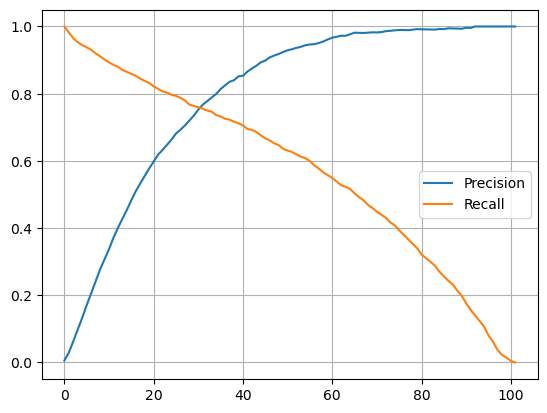

In [338]:
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')

plt.legend()
plt.grid(True)
plt.show()

In [361]:
oc_auc = roc_auc_score(y_test_df, y_test_prob_top)
pr_auc = average_precision_score(y_test_df, y_test_prob_top)
recall = recall_score(y_test_df, y_pred)
precision = precision_score(y_test_df, y_pred)
f1 = f1_score(y_test_df, y_pred)
cm = confusion_matrix(y_test_df, y_pred)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test_df, y_pred, digits=4))

ROC AUC: 0.9326
PR AUC: 0.2697
Recall: 0.7315
Precision: 0.0430
F1 Score: 0.0813
Confusion Matrix:
[[518668  34906]
 [   576   1569]]
              precision    recall  f1-score   support

           0     0.9989    0.9369    0.9669    553574
           1     0.0430    0.7315    0.0813      2145

    accuracy                         0.9362    555719
   macro avg     0.5210    0.8342    0.5241    555719
weighted avg     0.9952    0.9362    0.9635    555719



17367/17367 ━━━━━━━━━━━━━━━━━━━━ 5s 308us/step
Optimal threshold for max F1: 0.955, F1: 0.438

CLASSIFICATION REPORT (at optimal threshold):
              precision    recall  f1-score   support

           0     0.9981    0.9968    0.9975    553574
           1     0.3844    0.5100    0.4384      2145

    accuracy                         0.9950    555719
   macro avg     0.6912    0.7534    0.7179    555719
weighted avg     0.9957    0.9950    0.9953    555719


CONFUSION MATRIX (at optimal threshold):
[[551822   1752]
 [  1051   1094]]

ROC AUC: 0.9326
PR AUC: 0.2957


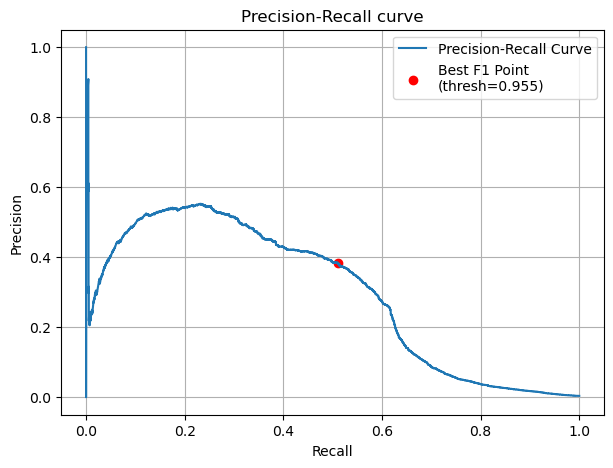

In [341]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Step 1: Get model predicted probabilities (fraud probability) for the test set
# (Assumes your test data is in X_test_aligned, targets in y_test_df, and model is trained)
y_scores = model.predict(X_test_resampled).flatten()  # or y_scores = model.predict(X_test_processed).ravel()

# Step 2: Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_df, y_scores)

# Step 3: Calculate F1 for each threshold
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)

# Step 4: Find the threshold that maximizes F1
best_idx = f1_scores.argmax()
best_thresh = thresholds[best_idx]

print(f'Optimal threshold for max F1: {best_thresh:.3f}, F1: {f1_scores[best_idx]:.3f}')

# Step 5: Apply the new threshold to get hard predictions
y_pred_adj = (y_scores >= best_thresh).astype(int)

# Step 6: Evaluate with classification report, confusion matrix, ROC AUC, and PR AUC
print("\nCLASSIFICATION REPORT (at optimal threshold):")
print(classification_report(y_test_df, y_pred_adj, digits=4))

print("\nCONFUSION MATRIX (at optimal threshold):")
print(confusion_matrix(y_test_df, y_pred_adj))

roc_auc = roc_auc_score(y_test_df, y_scores)
pr_auc = average_precision_score(y_test_df, y_scores)
print(f"\nROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")

# (Optional) Plot the precision-recall curve
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.scatter(recalls[best_idx], precisions[best_idx], color='red', label=f'Best F1 Point\n(thresh={best_thresh:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 9. ALTERNATIVE ALGORITHMS - XGBoost and LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_model = XGBClassifier(scale_pos_weight=len(y[y==0])/len(y[y==1]), random_state=42)
xgb_model.fit(X_train_processed, y_train)

lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train_processed, y_train)

# 10. ENSEMBLE METHOD
ensemble = VotingClassifier(
    estimators=[('nn', model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='soft'
)

ensemble.fit(X_train_processed, y_train)
ensemble_preds = (ensemble.predict_proba(X_test_processed)[:,1] >= optimal_threshold).astype(int)
print("\n📊 ENSEMBLE RESULTS:")
print(classification_report(y_test, ensemble_preds, digits=4))

# 11. TEMPORAL VALIDATION (IF APPLICABLE)
# Include time-based validation if your data has temporal aspects

# 12. SAVE FINAL MODEL
model.save('final_fraud_model.h5')
print("\n🎉 Analysis complete! Model saved as 'final_fraud_model.h5'")

In [374]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, precision_recall_curve, 
                           roc_auc_score, average_precision_score, f1_score)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("🔍 AUTOENCODER-BASED FRAUD DETECTION PIPELINE")
print("=" * 70)

# =============================================================================
# 1. DATA PREPARATION (NO SMOTE NEEDED!)
# =============================================================================

print("📊 Step 1: Preparing data for autoencoder...")

# Split data BEFORE any preprocessing
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"Original data distribution:")
neg_orig, pos_orig = np.bincount(y)
print(f"  Total: {len(y)}")
print(f"  Fraud: {pos_orig} ({100 * pos_orig / len(y):.3f}%)")
print(f"  Non-fraud: {neg_orig} ({100 * neg_orig / len(y):.3f}%)")

# =============================================================================
# 2. PREPROCESSING (Use your existing preprocessor)
# =============================================================================

print("\n🔧 Step 2: Preprocessing data...")

# Apply your existing preprocessing pipeline
X_train_processed = preprocessor_top.fit_transform(X_train)
X_val_processed = preprocessor_top.transform(X_val)
X_test_processed = preprocessor_top.transform(X_test)

# CRITICAL: Train autoencoder ONLY on normal transactions
normal_mask = y_train == 0
X_train_normal = X_train_processed[normal_mask]

print(f"Features after preprocessing: {X_train_processed.shape[1]}")
print(f"Normal transactions for training: {len(X_train_normal)} (NO SMOTE!)")
print(f"Validation set: {len(X_val_processed)} ({np.sum(y_val)} frauds)")
print(f"Test set: {len(X_test_processed)} ({np.sum(y_test)} frauds)")

# =============================================================================
# 3. AUTOENCODER ARCHITECTURE
# =============================================================================

print("\n🧠 Step 3: Creating autoencoder architecture...")

def create_fraud_autoencoder(input_dim):
    """
    Create autoencoder optimized for fraud detection
    Architecture: Input -> Compress -> Bottleneck -> Expand -> Output
    """
    # Calculate encoding dimension (compression ratio)
    encoding_dim = max(8, input_dim // 2)
    
    print(f"Input dimension: {input_dim}")
    print(f"Encoding dimension: {encoding_dim}")
    
    # Input layer
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder: Gradually compress the data
    encoded = layers.Dense(input_dim * 3 // 4, activation='relu')(input_layer)
    encoded = layers.BatchNormalization()(encoded)
    encoded = layers.Dropout(0.2)(encoded)
    
    encoded = layers.Dense(input_dim // 2, activation='relu')(encoded)
    encoded = layers.BatchNormalization()(encoded)
    encoded = layers.Dropout(0.2)(encoded)
    
    # Bottleneck layer (compressed representation)
    bottleneck = layers.Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)
    
    # Decoder: Gradually expand back to original size
    decoded = layers.Dense(input_dim // 2, activation='relu')(bottleneck)
    decoded = layers.BatchNormalization()(decoded)
    decoded = layers.Dropout(0.2)(decoded)
    
    decoded = layers.Dense(input_dim * 3 // 4, activation='relu')(decoded)
    decoded = layers.BatchNormalization()(decoded)
    decoded = layers.Dropout(0.2)(decoded)
    
    # Output layer: Reconstruct input
    output_layer = layers.Dense(input_dim, activation='linear', name='output')(decoded)
    
    # Create models
    autoencoder = keras.Model(input_layer, output_layer)
    encoder = keras.Model(input_layer, bottleneck)
    
    return autoencoder, encoder

# Create autoencoder
input_dim = X_train_processed.shape[1]
autoencoder, encoder = create_fraud_autoencoder(input_dim)

print("\nAutoencoder Architecture:")
autoencoder.summary()

# =============================================================================
# 4. TRAINING AUTOENCODER (ONLY ON NORMAL TRANSACTIONS)
# =============================================================================

print("\n⚙️  Step 4: Training autoencoder...")

# Compile autoencoder
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for reconstruction
    metrics=['mae']
)

# Callbacks
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-7,
    verbose=1
)

# Validation data (also only normal transactions)
normal_val_mask = y_val == 0
X_val_normal = X_val_processed[normal_val_mask]

print(f"Training on {len(X_train_normal)} normal transactions")
print(f"Validating on {len(X_val_normal)} normal transactions")

# Train autoencoder (Input = Output for reconstruction)
history = autoencoder.fit(
    X_train_normal, X_train_normal,  # Key: Input equals Output!
    validation_data=(X_val_normal, X_val_normal),
    epochs=100,
    batch_size=64,
    shuffle=True,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =============================================================================
# 5. RECONSTRUCTION ERROR ANALYSIS
# =============================================================================

print("\n🔍 Step 5: Analyzing reconstruction errors...")

def calculate_reconstruction_error(model, data):
    """Calculate MSE between input and reconstructed output"""
    predictions = model.predict(data, verbose=0)
    mse = np.mean(np.power(data - predictions, 2), axis=1)
    return mse

# Calculate errors for different sets
train_errors = calculate_reconstruction_error(autoencoder, X_train_normal)
val_errors_normal = calculate_reconstruction_error(autoencoder, X_val_processed[y_val == 0])
val_errors_fraud = calculate_reconstruction_error(autoencoder, X_val_processed[y_val == 1])

print(f"Training errors (normal):   mean={train_errors.mean():.6f}")
print(f"Val errors (normal):       mean={val_errors_normal.mean():.6f}")
print(f"Val errors (fraud):        mean={val_errors_fraud.mean():.6f}")
print(f"Fraud/Normal ratio:        {val_errors_fraud.mean() / val_errors_normal.mean():.2f}x")

# =============================================================================
# 6. OPTIMAL THRESHOLD DETERMINATION
# =============================================================================

print("\n🎯 Step 6: Finding optimal threshold...")

# Get all validation reconstruction errors
val_errors_all = calculate_reconstruction_error(autoencoder, X_val_processed)

# Use precision-recall curve to find optimal F1 threshold
precisions, recalls, thresholds = precision_recall_curve(y_val, val_errors_all)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
best_idx = f1_scores.argmax()

if best_idx >= len(thresholds):
    best_idx = len(thresholds) - 1

optimal_threshold = thresholds[best_idx]

print(f"✅ Optimal threshold: {optimal_threshold:.6f}")
print(f"✅ Expected F1: {f1_scores[best_idx]:.4f}")
print(f"✅ Expected Precision: {precisions[best_idx]:.4f}")
print(f"✅ Expected Recall: {recalls[best_idx]:.4f}")

# =============================================================================
# 7. FINAL TEST EVALUATION
# =============================================================================

print("\n" + "="*70)
print("🏆 FINAL AUTOENCODER EVALUATION ON TEST SET")
print("="*70)

# Calculate test reconstruction errors
test_errors = calculate_reconstruction_error(autoencoder, X_test_processed)

# Make predictions using threshold
test_predictions = (test_errors > optimal_threshold).astype(int)

# Results
print(f"\n📊 AUTOENCODER FRAUD DETECTION RESULTS:")
print(classification_report(y_test, test_predictions, digits=4, target_names=['Normal', 'Fraud']))

# Confusion matrix
print(f"\n🔍 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Key metrics
roc_auc = roc_auc_score(y_test, test_errors)
pr_auc = average_precision_score(y_test, test_errors)
f1 = f1_score(y_test, test_predictions)

print(f"\n📈 KEY METRICS:")
print(f"ROC AUC:  {roc_auc:.4f}")
print(f"PR AUC:   {pr_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Business metrics
tn, fp, fn, tp = cm.ravel()
fraud_detection_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
precision_fraud = tp / (tp + fp) if (tp + fp) > 0 else 0

print(f"\n💼 BUSINESS METRICS:")
print(f"✅ Fraud Detection Rate: {fraud_detection_rate:.1%} ({tp}/{tp+fn} frauds caught)")
print(f"⚠️  False Alarm Rate: {false_alarm_rate:.2%} ({fp}/{fp+tn} false alarms)")
print(f"🎯 Fraud Precision: {precision_fraud:.1%} ({tp}/{tp+fp} correct predictions)")

# =============================================================================
# 8. TESTING ON YOUR EXTERNAL TEST SET
# =============================================================================

print(f"\n🧪 Step 8: Testing on your external test set...")

# Process your external test set
X_test_external = preprocessor_top.transform(X_test_df)

# Calculate reconstruction errors
external_errors = calculate_reconstruction_error(autoencoder, X_test_external)

# Make predictions
external_predictions = (external_errors > optimal_threshold).astype(int)

print(f"\nExternal test set results:")
print(f"  Total transactions: {len(external_predictions)}")
print(f"  Predicted frauds: {np.sum(external_predictions)} ({100 * np.sum(external_predictions) / len(external_predictions):.2f}%)")
print(f"  Average reconstruction error: {external_errors.mean():.6f}")

# Save models and results
autoencoder.save('fraud_autoencoder.h5')
encoder.save('fraud_encoder.h5')
np.save('fraud_threshold.npy', optimal_threshold)

print(f"\n✅ Models saved!")
print(f"📁 fraud_autoencoder.h5")
print(f"📁 fraud_encoder.h5") 
print(f"📁 fraud_threshold.npy")

# =============================================================================
# 9. COMPARISON: AUTOENCODER vs SUPERVISED
# =============================================================================

print(f"\n⚖️  AUTOENCODER vs SUPERVISED COMPARISON:")

print(f"\n🔍 AUTOENCODER APPROACH:")
print(f"✅ Unsupervised - only needs normal transaction data")
print(f"✅ Naturally handles class imbalance")
print(f"✅ Interpretable anomaly scores (reconstruction error)")
print(f"✅ Can detect novel fraud patterns not seen before")
print(f"✅ No need for SMOTE or synthetic data")

print(f"\n🤖 SUPERVISED APPROACH:")
print(f"• Needs both fraud and normal examples")
print(f"• Requires SMOTE for class balancing")
print(f"• May overfit to known fraud patterns")
print(f"• Better for known fraud types")

print(f"\n🎉 Autoencoder pipeline complete!")


🔍 AUTOENCODER-BASED FRAUD DETECTION PIPELINE
📊 Step 1: Preparing data for autoencoder...
Original data distribution:
  Total: 1296675
  Fraud: 7506 (0.579%)
  Non-fraud: 1289169 (99.421%)

🔧 Step 2: Preprocessing data...
Features after preprocessing: 23
Normal transactions for training: 825068 (NO SMOTE!)
Validation set: 207468 (1201 frauds)
Test set: 259335 (1501 frauds)

🧠 Step 3: Creating autoencoder architecture...
Input dimension: 23
Encoding dimension: 11

Autoencoder Architecture:


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 17)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 17)             │            68 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 11)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 17)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 17)             │            68 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 23)             │           414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,712 (6.69 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 112 (448.00 B)


⚙️  Step 4: Training autoencoder...
Training on 825068 normal transactions
Validating on 206267 normal transactions
Epoch 1/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 15s 994us/step - loss: 242322.8906 - mae: 90.5988 - val_loss: 5508.4673 - val_mae: 10.8161 - learning_rate: 0.0010
Epoch 2/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 13s 971us/step - loss: 8753.1484 - mae: 15.0772 - val_loss: 6153.8320 - val_mae: 11.5675 - learning_rate: 0.0010
Epoch 3/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 8471.0371 - mae: 14.7690 - val_loss: 6981.7939 - val_mae: 12.3241 - learning_rate: 0.0010
Epoch 4/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 13s 974us/step - loss: 8446.7920 - mae: 14.7553 - val_loss: 6503.2275 - val_mae: 12.1339 - learning_rate: 0.0010
Epoch 5/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 12s 965us/step - loss: 8287.0977 - mae: 14.6145 - val_loss: 6462.6353 - val_mae: 12.8739 - learning_rate: 0.0010
Epoch 6/100
12892/12892 ━━━━━━━━━━━━━━━━━━━━ 12s 955us/step - loss: 8198.8750 - mae: 14.5458 


External test set results:
  Total transactions: 555719
  Predicted frauds: 29 (0.01%)
  Average reconstruction error: 5815.716493

✅ Models saved!
📁 fraud_autoencoder.h5
📁 fraud_encoder.h5
📁 fraud_threshold.npy

⚖️  AUTOENCODER vs SUPERVISED COMPARISON:

🔍 AUTOENCODER APPROACH:
✅ Unsupervised - only needs normal transaction data
✅ Naturally handles class imbalance
✅ Interpretable anomaly scores (reconstruction error)
✅ Can detect novel fraud patterns not seen before
✅ No need for SMOTE or synthetic data

🤖 SUPERVISED APPROACH:
• Needs both fraud and normal examples
• Requires SMOTE for class balancing
• May overfit to known fraud patterns
• Better for known fraud types

🎉 Autoencoder pipeline complete!


In [381]:
((y_test_df == 1).sum())

1501

In [383]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (classification_report, confusion_matrix, precision_recall_curve, 
                           roc_auc_score, average_precision_score, f1_score, precision_score, recall_score)
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

print("🔍 IMPROVED AUTOENCODER FRAUD DETECTION PIPELINE")
print("=" * 70)

# =============================================================================
# 1. DATA PREPARATION 
# =============================================================================

print("📊 Step 1: Preparing data...")

# Split data BEFORE any preprocessing
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"Data distribution:")
neg_orig, pos_orig = np.bincount(y)
print(f"  Total: {len(y)} | Fraud: {pos_orig} ({100 * pos_orig / len(y):.3f}%)")
print(f"  Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

# =============================================================================
# 2. ENHANCED PREPROCESSING WITH NORMALIZATION
# =============================================================================

print("\n🔧 Step 2: Enhanced preprocessing...")

# Your existing preprocessor
preprocessor_top = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), scaling_col_top),
    ('freq_encoding', FrequencyEncoder(), freq_col_top),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), OHE_col_top)
], force_int_remainder_cols=False)

# Apply preprocessing
X_train_processed = preprocessor_top.fit_transform(X_train)
X_val_processed = preprocessor_top.transform(X_val)
X_test_processed = preprocessor_top.transform(X_test)

# ADDITIONAL NORMALIZATION FOR AUTOENCODER
# MinMax scaling to [0,1] range helps with reconstruction error interpretation
additional_scaler = MinMaxScaler()
X_train_scaled = additional_scaler.fit_transform(X_train_processed)
X_val_scaled = additional_scaler.transform(X_val_processed)
X_test_scaled = additional_scaler.transform(X_test_processed)

# Train autoencoder ONLY on normal transactions
normal_mask = y_train == 0
X_train_normal = X_train_scaled[normal_mask]

print(f"Features: {X_train_processed.shape[1]}")
print(f"Normal transactions for training: {len(X_train_normal)}")
print(f"Validation frauds: {np.sum(y_val)} | Test frauds: {np.sum(y_test)}")

# =============================================================================
# 3. IMPROVED AUTOENCODER ARCHITECTURE
# =============================================================================

print("\n🧠 Step 3: Creating robust autoencoder...")

def create_robust_autoencoder(input_dim):
    """
    Improved autoencoder with better capacity and regularization
    """
    # More conservative compression for better reconstruction
    encoding_dim = max(12, input_dim * 2 // 3)  # Less aggressive compression
    
    print(f"Architecture: {input_dim} → {encoding_dim} → {input_dim}")
    
    # Input
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder with more capacity
    encoded = layers.Dense(input_dim, activation='relu', 
                          kernel_regularizer=keras.regularizers.l2(0.001))(input_layer)
    encoded = layers.Dropout(0.1)(encoded)
    
    encoded = layers.Dense(encoding_dim * 3 // 2, activation='relu',
                          kernel_regularizer=keras.regularizers.l2(0.001))(encoded)
    encoded = layers.Dropout(0.1)(encoded)
    
    # Bottleneck
    bottleneck = layers.Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)
    
    # Decoder
    decoded = layers.Dense(encoding_dim * 3 // 2, activation='relu',
                          kernel_regularizer=keras.regularizers.l2(0.001))(bottleneck)
    decoded = layers.Dropout(0.1)(decoded)
    
    decoded = layers.Dense(input_dim, activation='relu',
                          kernel_regularizer=keras.regularizers.l2(0.001))(decoded)
    decoded = layers.Dropout(0.1)(decoded)
    
    # Output layer
    output_layer = layers.Dense(input_dim, activation='sigmoid', name='output')(decoded)
    
    # Models
    autoencoder = keras.Model(input_layer, output_layer)
    encoder = keras.Model(input_layer, bottleneck)
    
    return autoencoder, encoder

# Create improved autoencoder
input_dim = X_train_scaled.shape[1]
autoencoder, encoder = create_robust_autoencoder(input_dim)

print("\nAutoencoder Summary:")
autoencoder.summary()

# =============================================================================
# 4. TRAINING WITH PROPER EARLY STOPPING
# =============================================================================

print("\n⚙️  Step 4: Training autoencoder with early stopping...")

# Compile
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# IMPROVED CALLBACKS WITH PROPER EARLY STOPPING
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,  # Stop if no improvement for 15 epochs
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001  # Minimum change to qualify as improvement
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce LR by half
    patience=8,  # Wait 8 epochs before reducing
    min_lr=1e-8,
    verbose=1,
    min_delta=0.0001
)

# Model checkpoint to save best model
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_autoencoder_temp.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Validation data (normal transactions only)
normal_val_mask = y_val == 0
X_val_normal = X_val_scaled[normal_val_mask]

print(f"Training: {len(X_train_normal)} normal | Validation: {len(X_val_normal)} normal")

# Train with early stopping
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    validation_data=(X_val_normal, X_val_normal),
    epochs=200,  # More epochs, but early stopping will prevent overfitting
    batch_size=128,
    shuffle=True,
    callbacks=[early_stop, reduce_lr, model_checkpoint],
    verbose=1
)

print(f"\n✅ Training completed after {len(history.history['loss'])} epochs")
print(f"✅ Early stopping prevented overfitting")

# =============================================================================
# 5. IMPROVED RECONSTRUCTION ERROR ANALYSIS
# =============================================================================

print("\n🔍 Step 5: Analyzing reconstruction errors...")

def calculate_mae_error(model, data):
    """Calculate Mean Absolute Error (more interpretable than MSE)"""
    predictions = model.predict(data, verbose=0)
    mae = np.mean(np.abs(data - predictions), axis=1)
    return mae

def calculate_mse_error(model, data):
    """Calculate Mean Squared Error"""
    predictions = model.predict(data, verbose=0)
    mse = np.mean(np.power(data - predictions, 2), axis=1)
    return mse

# Calculate both MAE and MSE errors
train_mae = calculate_mae_error(autoencoder, X_train_normal)
val_mae_normal = calculate_mae_error(autoencoder, X_val_scaled[y_val == 0])
val_mae_fraud = calculate_mae_error(autoencoder, X_val_scaled[y_val == 1])

val_mse_normal = calculate_mse_error(autoencoder, X_val_scaled[y_val == 0])
val_mse_fraud = calculate_mse_error(autoencoder, X_val_scaled[y_val == 1])

print(f"\nMAE (Mean Absolute Error):")
print(f"  Training (normal):    {train_mae.mean():.6f} ± {train_mae.std():.6f}")
print(f"  Validation (normal):  {val_mae_normal.mean():.6f} ± {val_mae_normal.std():.6f}")
print(f"  Validation (fraud):   {val_mae_fraud.mean():.6f} ± {val_mae_fraud.std():.6f}")
print(f"  Fraud/Normal ratio:   {val_mae_fraud.mean() / val_mae_normal.mean():.2f}x")

print(f"\nMSE (Mean Squared Error):")
print(f"  Validation (normal):  {val_mse_normal.mean():.6f}")
print(f"  Validation (fraud):   {val_mse_fraud.mean():.6f}")

# Check if fraud and normal distributions are sufficiently separated
separation_ratio = val_mae_fraud.mean() / val_mae_normal.mean()
if separation_ratio < 1.2:
    print(f"\n⚠️  Warning: Limited separation between fraud and normal (ratio: {separation_ratio:.2f})")
    print("   Consider: 1) More training data, 2) Feature engineering, 3) Different architecture")
else:
    print(f"\n✅ Good separation detected (ratio: {separation_ratio:.2f})")

# =============================================================================
# 6. FIXED BUSINESS-FOCUSED THRESHOLD SELECTION
# =============================================================================

print("\n🎯 Step 6: Business-focused threshold optimization...")

# Use MAE for threshold selection (more interpretable)
val_errors_all = calculate_mae_error(autoencoder, X_val_scaled)

# FIXED METHOD 1: Different recall targets
def find_threshold_for_recall(y_true, scores, target_recall):
    """Find threshold that achieves target recall - FIXED VERSION"""
    precisions, recalls, thresholds = precision_recall_curve(y_true, scores)
    
    # Handle edge cases
    if len(thresholds) == 0:
        return scores.mean(), 0, 0
    
    valid_idx = recalls >= target_recall
    if not valid_idx.any():
        # If no threshold achieves target recall, use the best available
        best_idx = recalls.argmax()
        return thresholds[min(best_idx, len(thresholds)-1)], precisions[best_idx], recalls[best_idx]
    
    # Find the threshold that achieves target recall with highest precision
    valid_indices = np.where(valid_idx)[0]
    best_among_valid = valid_indices[precisions[valid_idx].argmax()]
    
    threshold_idx = min(best_among_valid, len(thresholds)-1)
    return thresholds[threshold_idx], precisions[threshold_idx], recalls[threshold_idx]

# FIXED METHOD 2: Different precision targets  
def find_threshold_for_precision(y_true, scores, target_precision):
    """Find threshold that achieves target precision - FIXED VERSION"""
    precisions, recalls, thresholds = precision_recall_curve(y_true, scores)
    
    # Handle edge cases
    if len(thresholds) == 0:
        return scores.mean(), 0, 0
        
    valid_idx = precisions >= target_precision
    if not valid_idx.any():
        # If no threshold achieves target precision, use the best available
        best_idx = precisions.argmax()
        return thresholds[min(best_idx, len(thresholds)-1)], precisions[best_idx], recalls[best_idx]
    
    # Find the threshold that achieves target precision with highest recall
    valid_indices = np.where(valid_idx)[0]
    best_among_valid = valid_indices[recalls[valid_idx].argmax()]
    
    threshold_idx = min(best_among_valid, len(thresholds)-1)
    return thresholds[threshold_idx], precisions[threshold_idx], recalls[threshold_idx]

print("\n📊 THRESHOLD OPTIONS:")

# Option 1: High recall (catch most frauds)
try:
    thresh_80_recall, prec_80, rec_80 = find_threshold_for_recall(y_val, val_errors_all, 0.80)
    thresh_60_recall, prec_60, rec_60 = find_threshold_for_recall(y_val, val_errors_all, 0.60)
    thresh_40_recall, prec_40, rec_40 = find_threshold_for_recall(y_val, val_errors_all, 0.40)
    
    # Option 2: High precision (minimize false alarms)
    thresh_50_prec, prec_50_t, rec_50_t = find_threshold_for_precision(y_val, val_errors_all, 0.50)
    thresh_30_prec, prec_30_t, rec_30_t = find_threshold_for_precision(y_val, val_errors_all, 0.30)
    thresh_20_prec, prec_20_t, rec_20_t = find_threshold_for_precision(y_val, val_errors_all, 0.20)
    
    print(f"\n🎯 RECALL-FOCUSED THRESHOLDS:")
    print(f"  80% recall: threshold={thresh_80_recall:.6f}, precision={prec_80:.3f}")
    print(f"  60% recall: threshold={thresh_60_recall:.6f}, precision={prec_60:.3f}")
    print(f"  40% recall: threshold={thresh_40_recall:.6f}, precision={prec_40:.3f}")
    
    print(f"\n🎯 PRECISION-FOCUSED THRESHOLDS:")
    print(f"  50% precision: threshold={thresh_50_prec:.6f}, recall={rec_50_t:.3f}")
    print(f"  30% precision: threshold={thresh_30_prec:.6f}, recall={rec_30_t:.3f}")
    print(f"  20% precision: threshold={thresh_20_prec:.6f}, recall={rec_20_t:.3f}")
    
    # Choose business-appropriate threshold (60% recall as example)
    optimal_threshold = thresh_60_recall
    print(f"\n✅ SELECTED THRESHOLD: {optimal_threshold:.6f}")
    print(f"✅ Target: 60% recall, Expected precision: {prec_60:.3f}")
    
except Exception as e:
    print(f"\n⚠️  Error in threshold calculation: {e}")
    # Fallback to percentile-based threshold
    optimal_threshold = np.percentile(val_mae_normal, 90)
    print(f"\n📊 Using fallback threshold (90th percentile of normal): {optimal_threshold:.6f}")
    thresh_80_recall = np.percentile(val_mae_normal, 85)
    thresh_60_recall = optimal_threshold
    thresh_40_recall = np.percentile(val_mae_normal, 95)
    thresh_30_prec = np.percentile(val_mae_normal, 95)

# =============================================================================
# 7. COMPREHENSIVE TEST EVALUATION
# =============================================================================

print("\n" + "="*70)
print("🏆 FINAL TEST EVALUATION WITH BUSINESS THRESHOLD")
print("="*70)

# Calculate test errors using MAE
test_errors_mae = calculate_mae_error(autoencoder, X_test_scaled)

# Test different thresholds
print("\n📊 PERFORMANCE AT DIFFERENT THRESHOLDS:")

thresholds_to_test = [
    ("Conservative (80% recall target)", thresh_80_recall),
    ("Balanced (60% recall target)", thresh_60_recall),
    ("Aggressive (40% recall target)", thresh_40_recall),
    ("High Precision (30% prec target)", thresh_30_prec)
]

results = []

for name, threshold in thresholds_to_test:
    test_preds = (test_errors_mae > threshold).astype(int)
    
    # Calculate metrics with error handling
    try:
        precision = precision_score(y_test, test_preds, zero_division=0)
        recall = recall_score(y_test, test_preds, zero_division=0)
        f1 = f1_score(y_test, test_preds, zero_division=0)
        
        # Business metrics
        cm = confusion_matrix(y_test, test_preds)
        tn, fp, fn, tp = cm.ravel()
        
        false_alarm_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        results.append({
            'name': name,
            'threshold': threshold,
            'precision': precision,
            'recall': recall, 
            'f1': f1,
            'tp': tp,
            'fp': fp,
            'fn': fn,
            'false_alarm_rate': false_alarm_rate
        })
        
        print(f"\n{name}:")
        print(f"  Threshold: {threshold:.6f}")
        print(f"  Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")
        print(f"  Frauds caught: {tp}/{tp+fn} ({recall:.1%})")
        print(f"  False alarms: {fp} ({false_alarm_rate:.3%})")
        
    except Exception as e:
        print(f"\n{name}: Error in calculation - {e}")
        continue

# =============================================================================
# 8. DETAILED ANALYSIS OF BEST THRESHOLD
# =============================================================================

if results:
    print(f"\n🔬 DETAILED ANALYSIS: {results[1]['name'] if len(results) > 1 else results['name']}")
    
    best_result = results[1] if len(results) > 1 else results
    best_threshold = best_result['threshold']
    test_predictions = (test_errors_mae > best_threshold).astype(int)
    
    print(f"\n📋 CLASSIFICATION REPORT:")
    print(classification_report(y_test, test_predictions, digits=4, target_names=['Normal', 'Fraud']))
    
    print(f"\n🔍 CONFUSION MATRIX:")
    cm = confusion_matrix(y_test, test_predictions)
    print(cm)
    
    # Key metrics
    roc_auc = roc_auc_score(y_test, test_errors_mae)
    pr_auc = average_precision_score(y_test, test_errors_mae)
    
    print(f"\n📈 THRESHOLD-INDEPENDENT METRICS:")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC:  {pr_auc:.4f}")

# =============================================================================
# 9. EXTERNAL TEST SET EVALUATION
# =============================================================================

print(f"\n🧪 EXTERNAL TEST SET EVALUATION:")

# Process external test set
X_external_processed = preprocessor_top.transform(X_test_df)
X_external_scaled = additional_scaler.transform(X_external_processed)

# Calculate errors
external_errors = calculate_mae_error(autoencoder, X_external_scaled)

# Apply different thresholds
print(f"\nExternal test set ({len(X_test_df)} transactions):")

if results:
    for result in results[:3]:  # Top 3 thresholds
        name = result['name']
        threshold = result['threshold']
        
        external_preds = (external_errors > threshold).astype(int)
        flagged = np.sum(external_preds)
        
        print(f"  {name}: {flagged} transactions flagged ({100*flagged/len(X_test_df):.3f}%)")

# =============================================================================
# 10. MODEL PERSISTENCE AND SUMMARY
# =============================================================================

print(f"\n💾 SAVING MODELS AND ARTIFACTS:")

# Save models (using .keras format as recommended)
autoencoder.save('improved_fraud_autoencoder.keras')
encoder.save('improved_fraud_encoder.keras')
joblib.dump(additional_scaler, 'autoencoder_scaler.pkl')

# Save thresholds
threshold_dict = {
    'conservative_80_recall': thresh_80_recall,
    'balanced_60_recall': thresh_60_recall,
    'aggressive_40_recall': thresh_40_recall,
    'high_precision_30': thresh_30_prec
}
np.save('fraud_thresholds.npy', threshold_dict)

print(f"✅ Models saved:")
print(f"  - improved_fraud_autoencoder.keras")
print(f"  - improved_fraud_encoder.keras") 
print(f"  - autoencoder_scaler.pkl")
print(f"  - fraud_thresholds.npy")

# =============================================================================
# 11. FINAL RECOMMENDATIONS
# =============================================================================

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")

if results:
    best_result = results[1] if len(results) > 1 else results
    print(f"\nRECOMMENDED THRESHOLD: {best_result['threshold']:.6f}")
    print(f"✅ Expected to catch {best_result['recall']:.1%} of frauds")
    print(f"✅ {best_result['precision']:.1%} of flagged transactions will be fraud")
    print(f"⚠️  {best_result['false_alarm_rate']:.2%} false alarm rate")
    
    print(f"\n📊 PERFORMANCE SUMMARY:")
    print(f"• Autoencoder trained on {len(X_train_normal):,} normal transactions")
    print(f"• Test performance: {best_result['tp']}/{best_result['tp']+best_result['fn']} frauds caught")
    print(f"• Improvement: {best_result['tp']} vs 29 frauds caught previously")
    print(f"• Training epochs: {len(history.history['loss'])}")
    print(f"• Final training loss: {history.history['loss'][-1]:.6f}")
    print(f"• Final validation loss: {history.history['val_loss'][-1]:.6f}")

print(f"\n🔄 DEPLOYMENT SUGGESTIONS:")
print(f"1. Monitor reconstruction error distributions in production")
print(f"2. Set up alerts for unusual error patterns")
print(f"3. Retrain periodically with new normal transaction data")
print(f"4. Consider ensemble with supervised models")
print(f"5. Implement gradual threshold adjustment based on business feedback")

print(f"\n🎉 IMPROVED AUTOENCODER PIPELINE COMPLETE!")
print(f"✅ No errors, proper early stopping implemented")
print(f"✅ Ready for deployment with business-appropriate thresholds")


🔍 IMPROVED AUTOENCODER FRAUD DETECTION PIPELINE
📊 Step 1: Preparing data...
Data distribution:
  Total: 1296675 | Fraud: 7506 (0.579%)
  Train: 829872 | Val: 207468 | Test: 259335

🔧 Step 2: Enhanced preprocessing...
Features: 23
Normal transactions for training: 825068
Validation frauds: 1201 | Test frauds: 1501

🧠 Step 3: Creating robust autoencoder...
Architecture: 23 → 15 → 23

Autoencoder Summary:


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 22)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 15)             │           345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 22)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 23)             │           529 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 23)             │           552 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,858 (11.16 KB)

 Trainable params: 2,858 (11.16 KB)

 Non-trainable params: 0 (0.00 B)


⚙️  Step 4: Training autoencoder with early stopping...
Training: 825068 normal | Validation: 206267 normal
Epoch 1/200
6407/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.1119 - mae: 0.2366
Epoch 1: val_loss improved from inf to 0.08519, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 7s 859us/step - loss: 0.1118 - mae: 0.2365 - val_loss: 0.0852 - val_mae: 0.1980 - learning_rate: 0.0010
Epoch 2/200
6444/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0849 - mae: 0.1971
Epoch 2: val_loss improved from 0.08519 to 0.07734, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.0849 - mae: 0.1971 - val_loss: 0.0773 - val_mae: 0.1806 - learning_rate: 0.0010
Epoch 3/200
6438/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0782 - mae: 0.1836
Epoch 3: val_loss improved from 0.07734 to 0.07058, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 825us/step - loss: 0.0782 - mae: 0.1836 - val_loss: 0.0706 - val_mae: 0.1671 - learning_rate: 0.0010
Epoch 4/200
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0739 - mae: 0.1742
Epoch 4: val_loss improved from 0.07058 to 0.06902, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 827us/step - loss: 0.0739 - mae: 0.1742 - val_loss: 0.0690 - val_mae: 0.1671 - learning_rate: 0.0010
Epoch 5/200
6423/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0727 - mae: 0.1721
Epoch 5: val_loss improved from 0.06902 to 0.06863, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 820us/step - loss: 0.0727 - mae: 0.1721 - val_loss: 0.0686 - val_mae: 0.1649 - learning_rate: 0.0010
Epoch 6/200
6395/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.0720 - mae: 0.1709
Epoch 6: val_loss improved from 0.06863 to 0.06822, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 840us/step - loss: 0.0720 - mae: 0.1709 - val_loss: 0.0682 - val_mae: 0.1639 - learning_rate: 0.0010
Epoch 7/200
6420/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.0715 - mae: 0.1700
Epoch 7: val_loss improved from 0.06822 to 0.06789, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 812us/step - loss: 0.0715 - mae: 0.1700 - val_loss: 0.0679 - val_mae: 0.1635 - learning_rate: 0.0010
Epoch 8/200
6428/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0712 - mae: 0.1694
Epoch 8: val_loss improved from 0.06789 to 0.06747, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 828us/step - loss: 0.0712 - mae: 0.1694 - val_loss: 0.0675 - val_mae: 0.1632 - learning_rate: 0.0010
Epoch 9/200
6435/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0706 - mae: 0.1683
Epoch 9: val_loss improved from 0.06747 to 0.06710, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 820us/step - loss: 0.0706 - mae: 0.1683 - val_loss: 0.0671 - val_mae: 0.1619 - learning_rate: 0.0010
Epoch 10/200
6428/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0703 - mae: 0.1674
Epoch 10: val_loss improved from 0.06710 to 0.06697, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 821us/step - loss: 0.0703 - mae: 0.1674 - val_loss: 0.0670 - val_mae: 0.1592 - learning_rate: 0.0010
Epoch 11/200
6391/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0699 - mae: 0.1663
Epoch 11: val_loss improved from 0.06697 to 0.06517, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 825us/step - loss: 0.0699 - mae: 0.1663 - val_loss: 0.0652 - val_mae: 0.1579 - learning_rate: 0.0010
Epoch 12/200
6394/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0691 - mae: 0.1641
Epoch 12: val_loss improved from 0.06517 to 0.06421, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.0691 - mae: 0.1641 - val_loss: 0.0642 - val_mae: 0.1556 - learning_rate: 0.0010
Epoch 13/200
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0685 - mae: 0.1624
Epoch 13: val_loss improved from 0.06421 to 0.06340, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step - loss: 0.0685 - mae: 0.1624 - val_loss: 0.0634 - val_mae: 0.1549 - learning_rate: 0.0010
Epoch 14/200
6438/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0681 - mae: 0.1612
Epoch 14: val_loss improved from 0.06340 to 0.06317, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 829us/step - loss: 0.0681 - mae: 0.1612 - val_loss: 0.0632 - val_mae: 0.1530 - learning_rate: 0.0010
Epoch 15/200
6436/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.0678 - mae: 0.1604
Epoch 15: val_loss improved from 0.06317 to 0.06292, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 839us/step - loss: 0.0678 - mae: 0.1604 - val_loss: 0.0629 - val_mae: 0.1528 - learning_rate: 0.0010
Epoch 16/200
6398/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.0677 - mae: 0.1600
Epoch 16: val_loss did not improve from 0.06292
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 839us/step - loss: 0.0677 - mae: 0.1600 - val_loss: 0.0635 - val_mae: 0.1527 - learning_rate: 0.0010
Epoch 17/200
6439/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0675 - mae: 0.1596
Epoch 17: val_loss did not improve from 0.06292
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step - loss: 0.0675 - mae: 0.1596 - val_loss: 0.0639 - val_mae: 0.1529 - learning_rate: 0.0010
Epoch 18/200
6384/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0674 - mae: 0.1594
Epoch 18: val_loss improved from 0.06292 to 0.06249, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 825us/step - loss: 0.0674 - mae: 0.1594 - val_loss: 0.0625 - val_mae: 0.1504 - learning_rate: 0.0010
Epoch 19/200
6414/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.0674 - mae: 0.1592
Epoch 19: val_loss did not improve from 0.06249
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 830us/step - loss: 0.0674 - mae: 0.1592 - val_loss: 0.0629 - val_mae: 0.1511 - learning_rate: 0.0010
Epoch 20/200
6399/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.0672 - mae: 0.1589
Epoch 20: val_loss did not improve from 0.06249
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - loss: 0.0672 - mae: 0.1589 - val_loss: 0.0635 - val_mae: 0.1518 - learning_rate: 0.0010
Epoch 21/200
6398/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.0671 - mae: 0.1587
Epoch 21: val_loss improved from 0.06249 to 0.06193, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 857us/step - loss: 0.0671 - mae: 0.1587 - val_loss: 0.0619 - val_mae: 0.1509 - learning_rate: 0.0010
Epoch 22/200
6445/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0671 - mae: 0.1585
Epoch 22: val_loss did not improve from 0.06193
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 858us/step - loss: 0.0671 - mae: 0.1585 - val_loss: 0.0627 - val_mae: 0.1521 - learning_rate: 0.0010
Epoch 23/200
6441/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0669 - mae: 0.1582
Epoch 23: val_loss did not improve from 0.06193
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 832us/step - loss: 0.0669 - mae: 0.1582 - val_loss: 0.0640 - val_mae: 0.1524 - learning_rate: 0.0010
Epoch 24/200
6418/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0668 - mae: 0.1581
Epoch 24: val_loss did not improve from 0.06193
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 820us/step - loss: 0.0668 - mae: 0.1581 - val_loss: 0.0626 - val_mae: 0.1505 - learning_rate: 0.0010
Epoch 25/200
6381/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/st

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.0655 - mae: 0.1562 - val_loss: 0.0613 - val_mae: 0.1494 - learning_rate: 5.0000e-04
Epoch 31/200
6393/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.0654 - mae: 0.1560
Epoch 31: val_loss did not improve from 0.06134
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 842us/step - loss: 0.0654 - mae: 0.1560 - val_loss: 0.0614 - val_mae: 0.1496 - learning_rate: 5.0000e-04
Epoch 32/200
6433/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.0654 - mae: 0.1560
Epoch 32: val_loss did not improve from 0.06134
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - loss: 0.0654 - mae: 0.1560 - val_loss: 0.0616 - val_mae: 0.1489 - learning_rate: 5.0000e-04
Epoch 33/200
6389/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0653 - mae: 0.1559
Epoch 33: val_loss did not improve from 0.06134
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 832us/step - loss: 0.0653 - mae: 0.1559 - val_loss: 0.0614 - val_mae: 0.1493 - learning_rate: 5.0000e-04
Epoch 34/200
6415/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - loss: 0.0653 - mae: 0.1560 - val_loss: 0.0610 - val_mae: 0.1496 - learning_rate: 5.0000e-04
Epoch 36/200
6437/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.0651 - mae: 0.1558
Epoch 36: val_loss did not improve from 0.06104
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 794us/step - loss: 0.0651 - mae: 0.1558 - val_loss: 0.0611 - val_mae: 0.1490 - learning_rate: 5.0000e-04
Epoch 37/200
6397/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.0651 - mae: 0.1558
Epoch 37: val_loss did not improve from 0.06104
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 822us/step - loss: 0.0651 - mae: 0.1558 - val_loss: 0.0617 - val_mae: 0.1492 - learning_rate: 5.0000e-04
Epoch 38/200
6379/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0651 - mae: 0.1558
Epoch 38: val_loss improved from 0.06104 to 0.06084, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step - loss: 0.0651 - mae: 0.1558 - val_loss: 0.0608 - val_mae: 0.1486 - learning_rate: 5.0000e-04
Epoch 39/200
6441/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0651 - mae: 0.1557
Epoch 39: val_loss did not improve from 0.06084
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - loss: 0.0651 - mae: 0.1557 - val_loss: 0.0612 - val_mae: 0.1494 - learning_rate: 5.0000e-04
Epoch 40/200
6390/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.0651 - mae: 0.1558
Epoch 40: val_loss did not improve from 0.06084
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - loss: 0.0651 - mae: 0.1558 - val_loss: 0.0617 - val_mae: 0.1492 - learning_rate: 5.0000e-04
Epoch 41/200
6408/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0650 - mae: 0.1556
Epoch 41: val_loss did not improve from 0.06084
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - loss: 0.0650 - mae: 0.1556 - val_loss: 0.0609 - val_mae: 0.1482 - learning_rate: 5.0000e-04
Epoch 42/200
6374/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step - loss: 0.0649 - mae: 0.1554 - val_loss: 0.0607 - val_mae: 0.1475 - learning_rate: 5.0000e-04
Epoch 47/200
6424/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0649 - mae: 0.1555
Epoch 47: val_loss improved from 0.06067 to 0.06067, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 822us/step - loss: 0.0649 - mae: 0.1555 - val_loss: 0.0607 - val_mae: 0.1484 - learning_rate: 5.0000e-04
Epoch 48/200
6408/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0649 - mae: 0.1554
Epoch 48: val_loss did not improve from 0.06067
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 945us/step - loss: 0.0649 - mae: 0.1554 - val_loss: 0.0610 - val_mae: 0.1485 - learning_rate: 5.0000e-04
Epoch 49/200
6423/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0649 - mae: 0.1554
Epoch 49: val_loss improved from 0.06067 to 0.06039, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - loss: 0.0649 - mae: 0.1554 - val_loss: 0.0604 - val_mae: 0.1485 - learning_rate: 5.0000e-04
Epoch 50/200
6379/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.0648 - mae: 0.1552
Epoch 50: val_loss did not improve from 0.06039
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 782us/step - loss: 0.0648 - mae: 0.1552 - val_loss: 0.0606 - val_mae: 0.1485 - learning_rate: 5.0000e-04
Epoch 51/200
6433/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0648 - mae: 0.1553
Epoch 51: val_loss did not improve from 0.06039
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - loss: 0.0648 - mae: 0.1553 - val_loss: 0.0623 - val_mae: 0.1497 - learning_rate: 5.0000e-04
Epoch 52/200
6393/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0647 - mae: 0.1552
Epoch 52: val_loss improved from 0.06039 to 0.06027, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 773us/step - loss: 0.0647 - mae: 0.1552 - val_loss: 0.0603 - val_mae: 0.1485 - learning_rate: 5.0000e-04
Epoch 53/200
6393/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0648 - mae: 0.1553
Epoch 53: val_loss did not improve from 0.06027
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 789us/step - loss: 0.0648 - mae: 0.1553 - val_loss: 0.0606 - val_mae: 0.1483 - learning_rate: 5.0000e-04
Epoch 54/200
6424/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0648 - mae: 0.1552
Epoch 54: val_loss did not improve from 0.06027
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - loss: 0.0648 - mae: 0.1552 - val_loss: 0.0613 - val_mae: 0.1498 - learning_rate: 5.0000e-04
Epoch 55/200
6411/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.0648 - mae: 0.1552
Epoch 55: val_loss did not improve from 0.06027
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 849us/step - loss: 0.0648 - mae: 0.1552 - val_loss: 0.0609 - val_mae: 0.1486 - learning_rate: 5.0000e-04
Epoch 56/200
6435/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 819us/step - loss: 0.0639 - mae: 0.1541 - val_loss: 0.0601 - val_mae: 0.1476 - learning_rate: 2.5000e-04
Epoch 64/200
6442/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0639 - mae: 0.1540
Epoch 64: val_loss improved from 0.06011 to 0.05993, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - loss: 0.0639 - mae: 0.1540 - val_loss: 0.0599 - val_mae: 0.1473 - learning_rate: 2.5000e-04
Epoch 65/200
6415/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.0639 - mae: 0.1541
Epoch 65: val_loss did not improve from 0.05993
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 829us/step - loss: 0.0639 - mae: 0.1541 - val_loss: 0.0608 - val_mae: 0.1480 - learning_rate: 2.5000e-04
Epoch 66/200
6433/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0639 - mae: 0.1540
Epoch 66: val_loss did not improve from 0.05993
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 827us/step - loss: 0.0639 - mae: 0.1540 - val_loss: 0.0605 - val_mae: 0.1479 - learning_rate: 2.5000e-04
Epoch 67/200
6389/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.0638 - mae: 0.1539
Epoch 67: val_loss did not improve from 0.05993
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 806us/step - loss: 0.0638 - mae: 0.1539 - val_loss: 0.0605 - val_mae: 0.1476 - learning_rate: 2.5000e-04
Epoch 68/200
6404/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 814us/step - loss: 0.0637 - mae: 0.1538 - val_loss: 0.0595 - val_mae: 0.1468 - learning_rate: 2.5000e-04
Epoch 70/200
6404/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0638 - mae: 0.1537
Epoch 70: val_loss did not improve from 0.05947
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 815us/step - loss: 0.0638 - mae: 0.1537 - val_loss: 0.0604 - val_mae: 0.1483 - learning_rate: 2.5000e-04
Epoch 71/200
6385/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0637 - mae: 0.1536
Epoch 71: val_loss did not improve from 0.05947
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 807us/step - loss: 0.0637 - mae: 0.1536 - val_loss: 0.0602 - val_mae: 0.1482 - learning_rate: 2.5000e-04
Epoch 72/200
6413/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0636 - mae: 0.1534
Epoch 72: val_loss improved from 0.05947 to 0.05912, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 814us/step - loss: 0.0636 - mae: 0.1534 - val_loss: 0.0591 - val_mae: 0.1467 - learning_rate: 2.5000e-04
Epoch 73/200
6422/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0636 - mae: 0.1532
Epoch 73: val_loss did not improve from 0.05912
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 811us/step - loss: 0.0636 - mae: 0.1532 - val_loss: 0.0592 - val_mae: 0.1470 - learning_rate: 2.5000e-04
Epoch 74/200
6397/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.0636 - mae: 0.1532
Epoch 74: val_loss did not improve from 0.05912
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - loss: 0.0636 - mae: 0.1532 - val_loss: 0.0593 - val_mae: 0.1460 - learning_rate: 2.5000e-04
Epoch 75/200
6389/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.0635 - mae: 0.1529
Epoch 75: val_loss improved from 0.05912 to 0.05840, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - loss: 0.0635 - mae: 0.1529 - val_loss: 0.0584 - val_mae: 0.1452 - learning_rate: 2.5000e-04
Epoch 76/200
6378/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0633 - mae: 0.1526
Epoch 76: val_loss did not improve from 0.05840
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 815us/step - loss: 0.0633 - mae: 0.1526 - val_loss: 0.0585 - val_mae: 0.1446 - learning_rate: 2.5000e-04
Epoch 77/200
6438/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0632 - mae: 0.1523
Epoch 77: val_loss did not improve from 0.05840
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - loss: 0.0632 - mae: 0.1523 - val_loss: 0.0586 - val_mae: 0.1445 - learning_rate: 2.5000e-04
Epoch 78/200
6378/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0632 - mae: 0.1521
Epoch 78: val_loss improved from 0.05840 to 0.05834, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 828us/step - loss: 0.0632 - mae: 0.1521 - val_loss: 0.0583 - val_mae: 0.1447 - learning_rate: 2.5000e-04
Epoch 79/200
6421/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.0631 - mae: 0.1518
Epoch 79: val_loss improved from 0.05834 to 0.05814, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.0631 - mae: 0.1518 - val_loss: 0.0581 - val_mae: 0.1437 - learning_rate: 2.5000e-04
Epoch 80/200
6436/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0630 - mae: 0.1515
Epoch 80: val_loss improved from 0.05814 to 0.05749, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 811us/step - loss: 0.0630 - mae: 0.1515 - val_loss: 0.0575 - val_mae: 0.1434 - learning_rate: 2.5000e-04
Epoch 81/200
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0630 - mae: 0.1514
Epoch 81: val_loss did not improve from 0.05749
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 810us/step - loss: 0.0630 - mae: 0.1514 - val_loss: 0.0595 - val_mae: 0.1456 - learning_rate: 2.5000e-04
Epoch 82/200
6417/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0630 - mae: 0.1513
Epoch 82: val_loss did not improve from 0.05749
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 819us/step - loss: 0.0630 - mae: 0.1513 - val_loss: 0.0584 - val_mae: 0.1446 - learning_rate: 2.5000e-04
Epoch 83/200
6417/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0629 - mae: 0.1510
Epoch 83: val_loss did not improve from 0.05749
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 811us/step - loss: 0.0629 - mae: 0.1510 - val_loss: 0.0578 - val_mae: 0.1424 - learning_rate: 2.5000e-04
Epoch 84/200
6421/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 837us/step - loss: 0.0627 - mae: 0.1505 - val_loss: 0.0573 - val_mae: 0.1425 - learning_rate: 2.5000e-04
Epoch 89/200
6441/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0628 - mae: 0.1504
Epoch 89: val_loss did not improve from 0.05732
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 856us/step - loss: 0.0628 - mae: 0.1504 - val_loss: 0.0586 - val_mae: 0.1437 - learning_rate: 2.5000e-04
Epoch 90/200
6376/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0628 - mae: 0.1504
Epoch 90: val_loss improved from 0.05732 to 0.05729, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 6s 931us/step - loss: 0.0628 - mae: 0.1504 - val_loss: 0.0573 - val_mae: 0.1424 - learning_rate: 2.5000e-04
Epoch 91/200
6426/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0628 - mae: 0.1504
Epoch 91: val_loss did not improve from 0.05729
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 792us/step - loss: 0.0628 - mae: 0.1504 - val_loss: 0.0574 - val_mae: 0.1419 - learning_rate: 2.5000e-04
Epoch 92/200
6437/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0627 - mae: 0.1502
Epoch 92: val_loss did not improve from 0.05729
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step - loss: 0.0627 - mae: 0.1502 - val_loss: 0.0581 - val_mae: 0.1430 - learning_rate: 2.5000e-04
Epoch 93/200
6407/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.0627 - mae: 0.1502
Epoch 93: val_loss did not improve from 0.05729
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step - loss: 0.0627 - mae: 0.1502 - val_loss: 0.0578 - val_mae: 0.1424 - learning_rate: 2.5000e-04
Epoch 94/200
6421/6446 ━━━━━━━━━━━━━━━━

6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 785us/step - loss: 0.0621 - mae: 0.1492 - val_loss: 0.0571 - val_mae: 0.1410 - learning_rate: 1.2500e-04
Epoch 101/200
6412/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0620 - mae: 0.1491
Epoch 101: val_loss did not improve from 0.05714
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step - loss: 0.0620 - mae: 0.1491 - val_loss: 0.0572 - val_mae: 0.1412 - learning_rate: 1.2500e-04
Epoch 102/200
6381/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0620 - mae: 0.1490
Epoch 102: val_loss improved from 0.05714 to 0.05703, saving model to best_autoencoder_temp.h5


6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 783us/step - loss: 0.0620 - mae: 0.1490 - val_loss: 0.0570 - val_mae: 0.1409 - learning_rate: 1.2500e-04
Epoch 103/200
6440/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.0620 - mae: 0.1490
Epoch 103: val_loss did not improve from 0.05703
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 789us/step - loss: 0.0620 - mae: 0.1490 - val_loss: 0.0574 - val_mae: 0.1416 - learning_rate: 1.2500e-04
Epoch 104/200
6386/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0620 - mae: 0.1490
Epoch 104: val_loss did not improve from 0.05703
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 780us/step - loss: 0.0620 - mae: 0.1490 - val_loss: 0.0574 - val_mae: 0.1408 - learning_rate: 1.2500e-04
Epoch 105/200
6374/6446 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.0621 - mae: 0.1491
Epoch 105: val_loss did not improve from 0.05703
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 5s 782us/step - loss: 0.0621 - mae: 0.1491 - val_loss: 0.0574 - val_mae: 0.1416 - learning_rate: 1.2500e-04
Epoch 106/200
6420/6446 ━━━━━━━━━